# Plotting and Visualization

## Description

### GitHub連結

[GitHub連結](https://github.com/wesm/pydata-book)

### Required Dataset

[SPX](https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv)  
[tips](https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv)  
[macro](https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/macrodata.csv)

## Required Packages

In [1]:
# If you are using Jupyter Notebook, please comment in below Python code.
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from io import BytesIO

In [3]:
np.random.seed(12345)

## 9.1 A Brief matplotlib API Primer

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


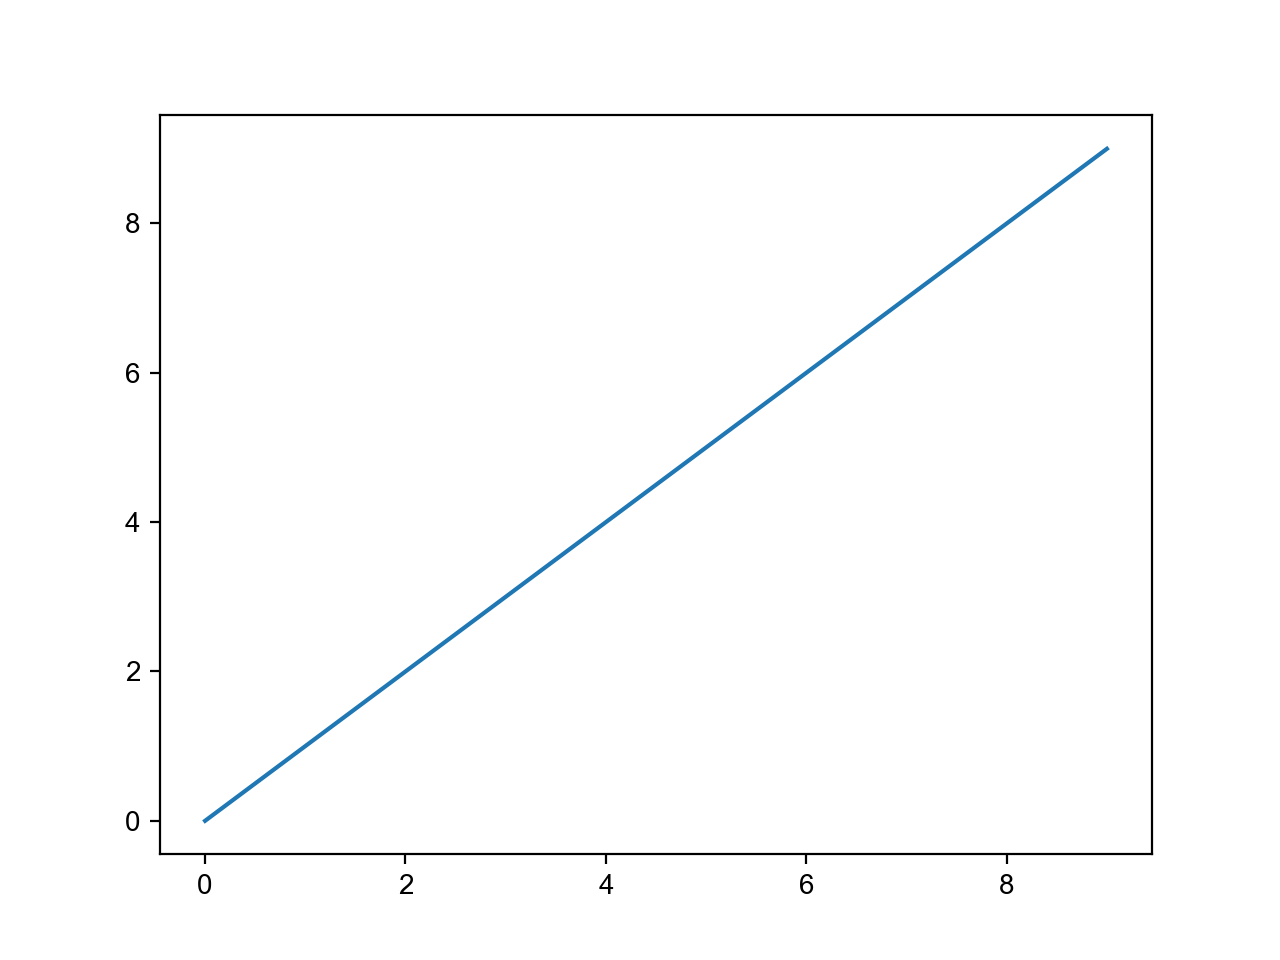

In [5]:
plt.plot(data)

### Figures and Subplots

<IPython.core.display.Javascript object>


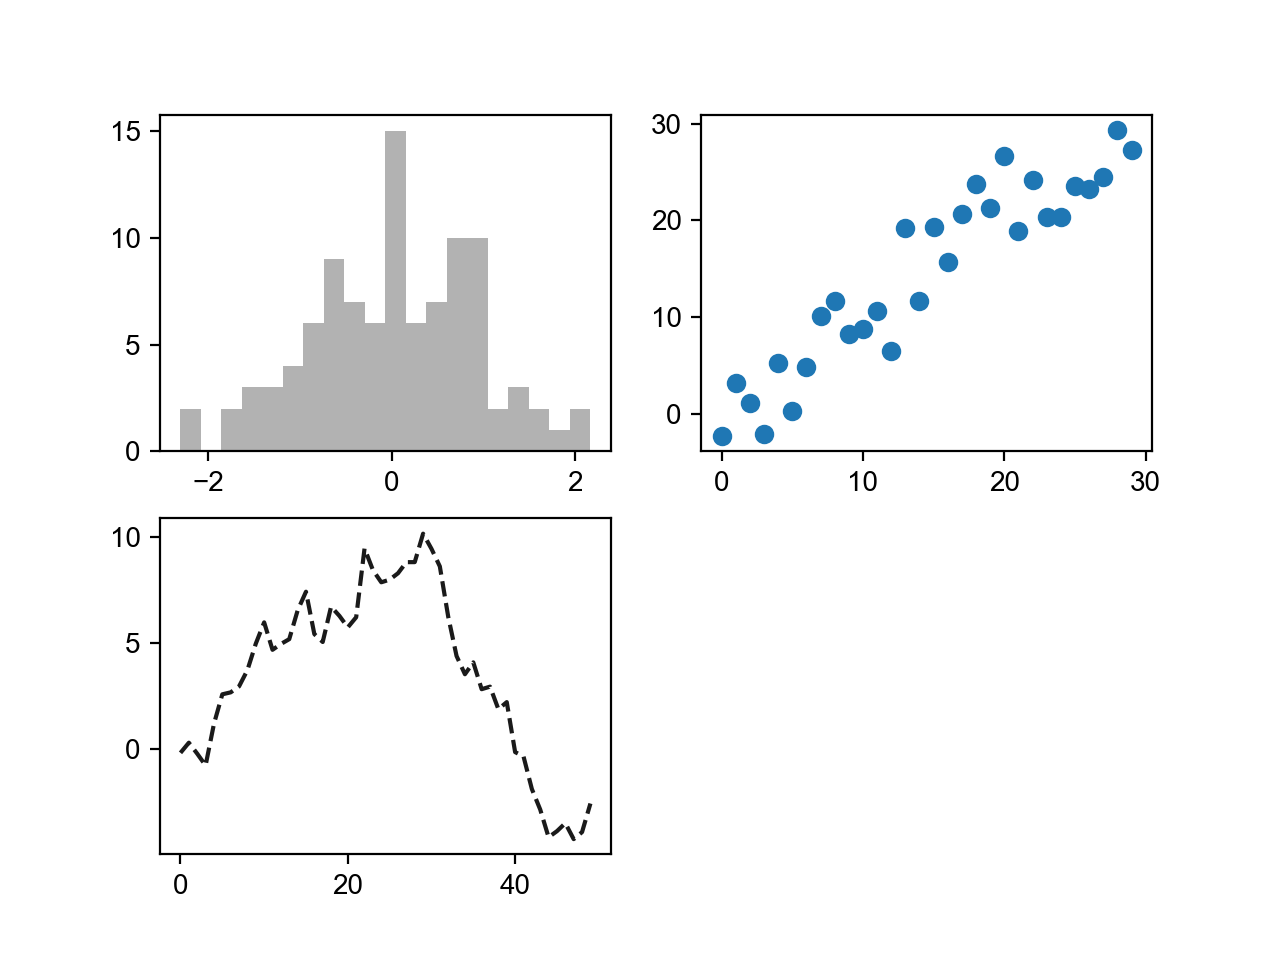

In [6]:
fig = plt.figure()

In [7]:
ax1 = fig.add_subplot(2, 2, 1)

In [8]:
ax2 = fig.add_subplot(2, 2, 2)

In [9]:
ax3 = fig.add_subplot(2, 2, 3)

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [11]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


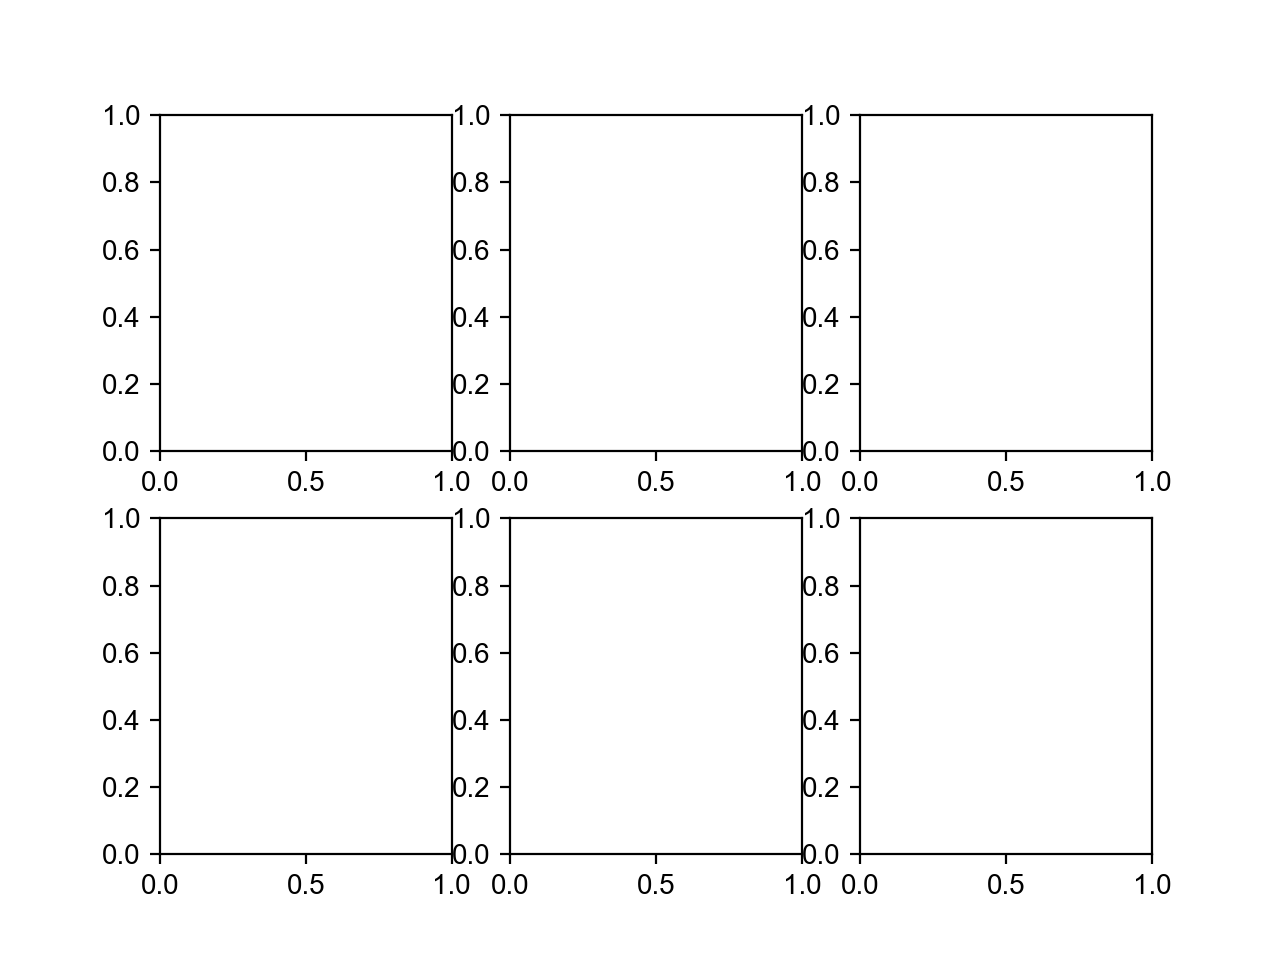

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

#### Adjusting the spacing around subplots

In [15]:
# subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<IPython.core.display.Javascript object>


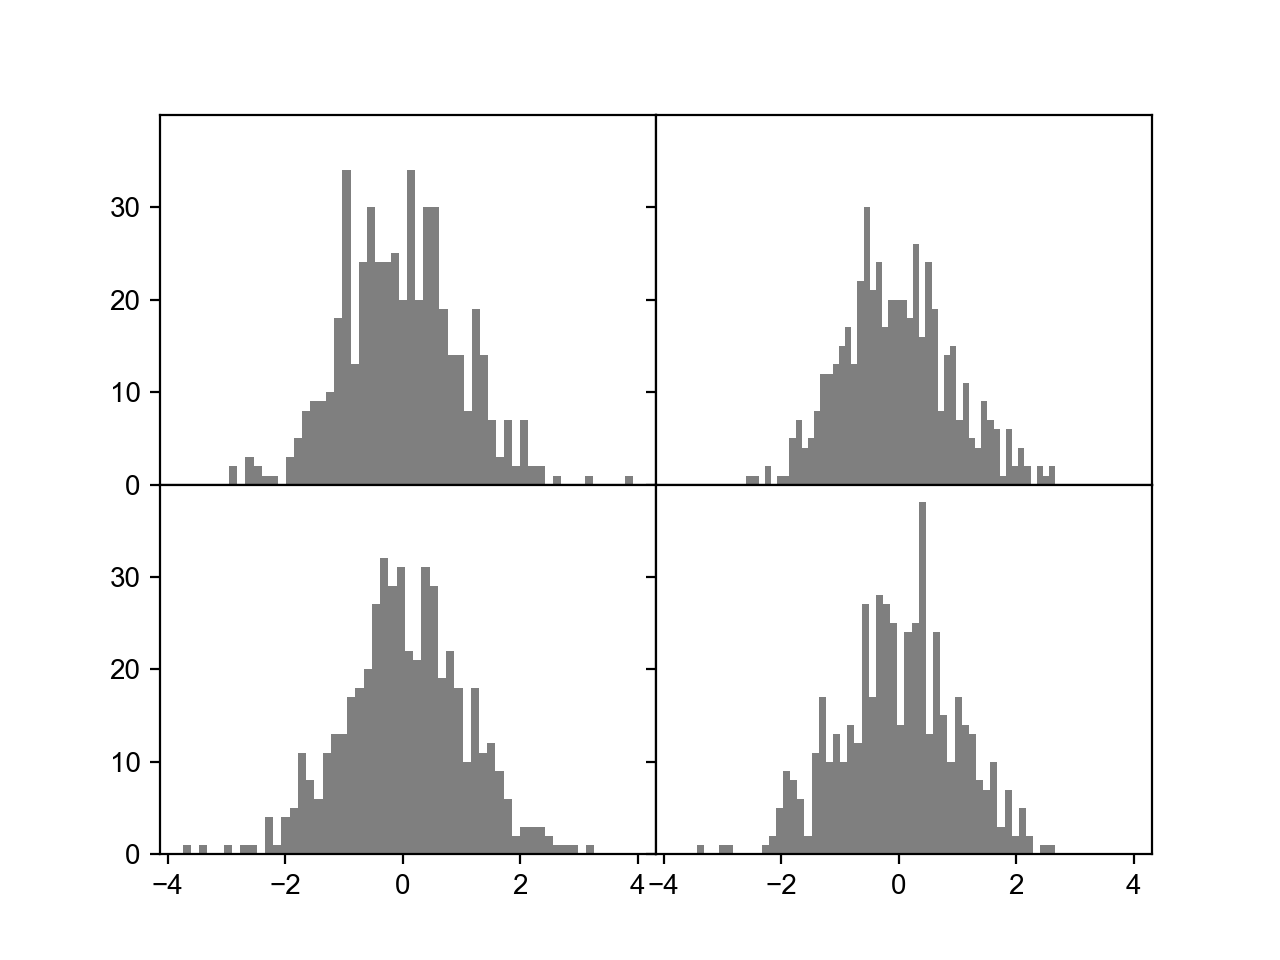

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

In [17]:
# ax.plot(x, y, 'g--')
# ax.plot(x, y, linestyle='==', color='g')

<IPython.core.display.Javascript object>


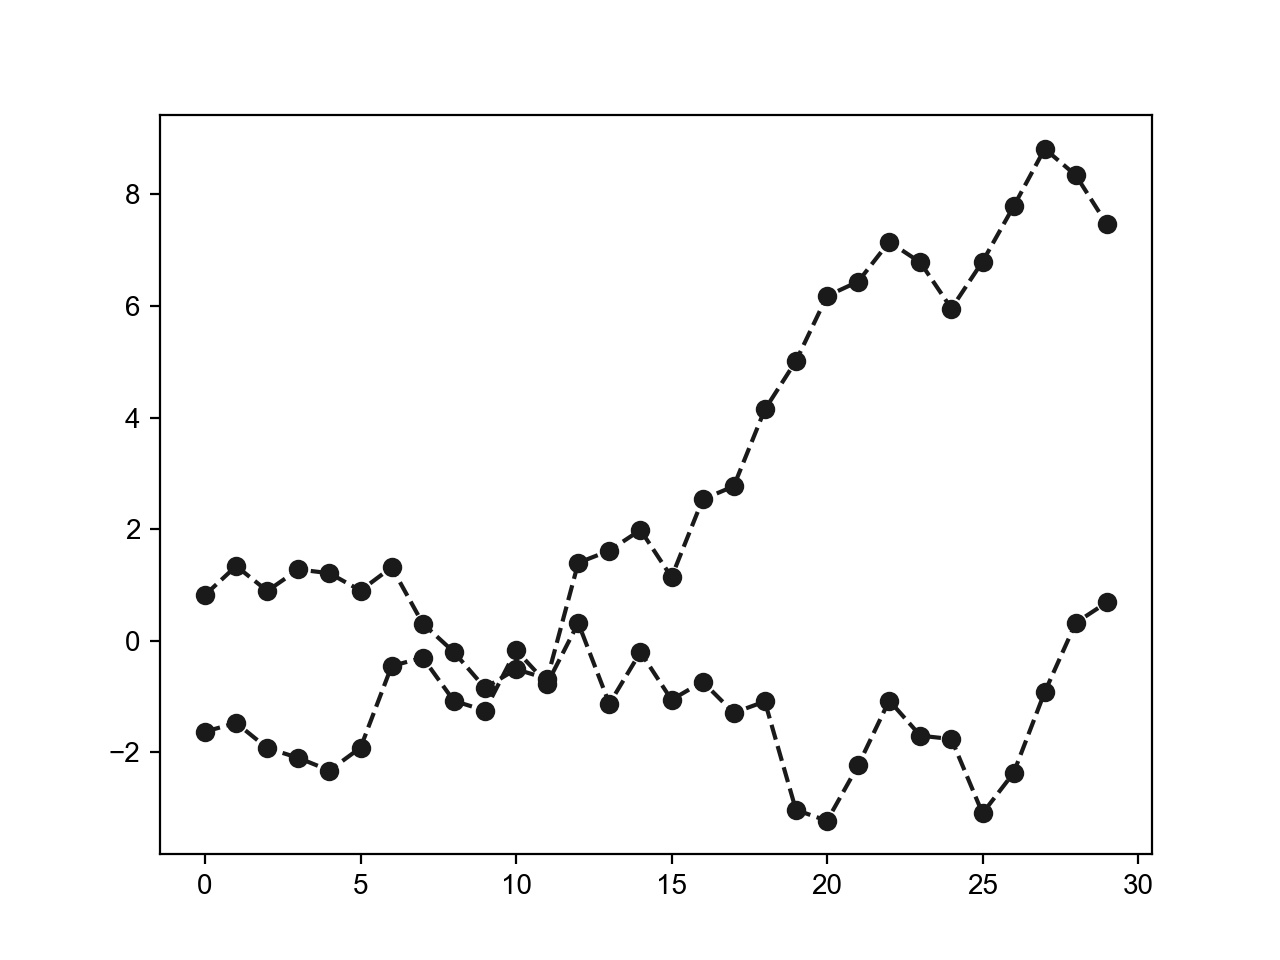

In [18]:
fig = plt.figure()

In [19]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

In [20]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


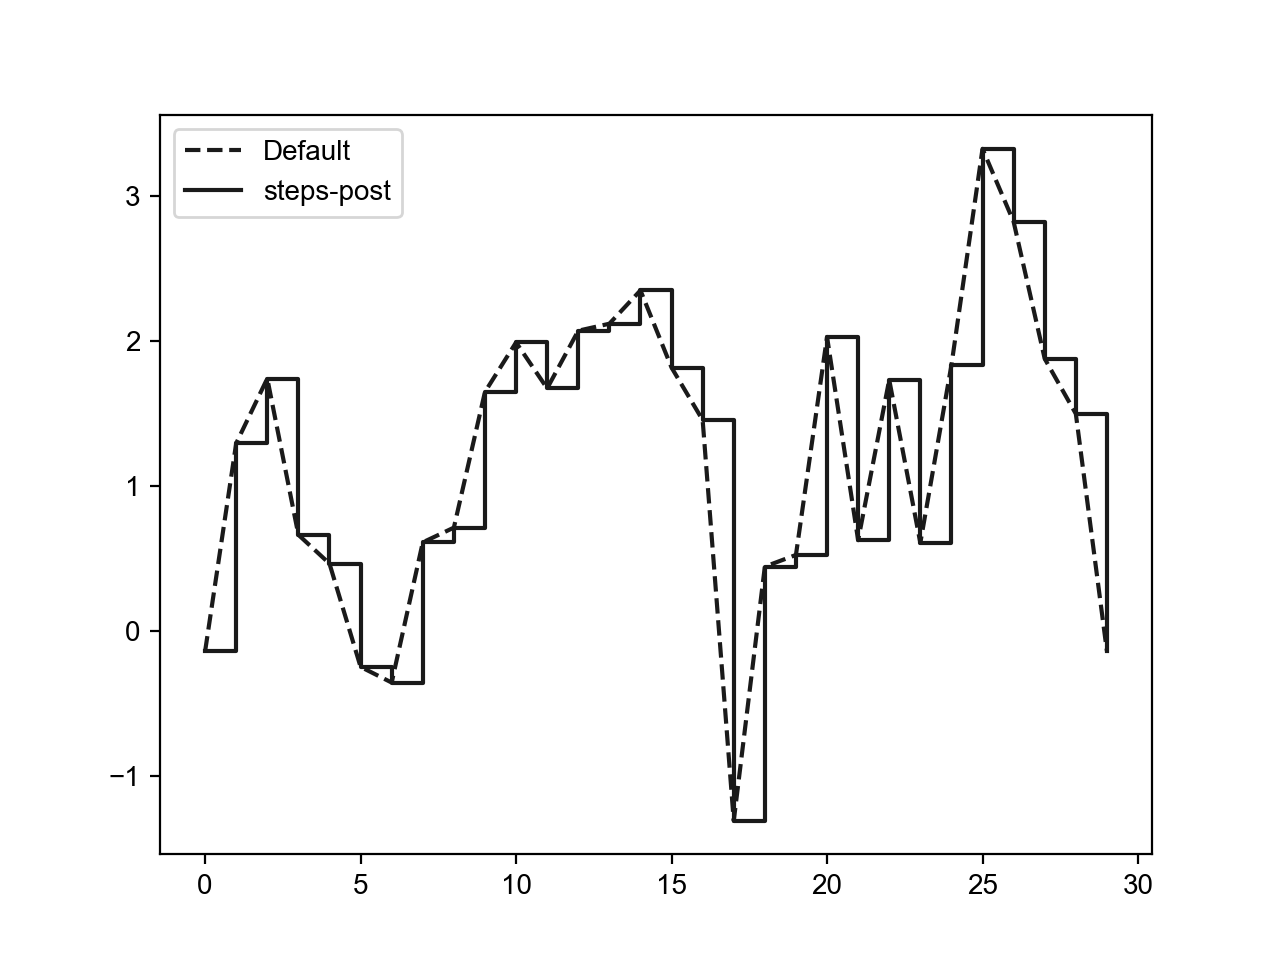

In [21]:
fig = plt.figure()

In [22]:
data = np.random.randn(30).cumsum()

In [23]:
plt.plot(data, 'k--', label='Default')

In [24]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [25]:
plt.legend(loc='best')

### Ticks, Labels, and Legends

#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


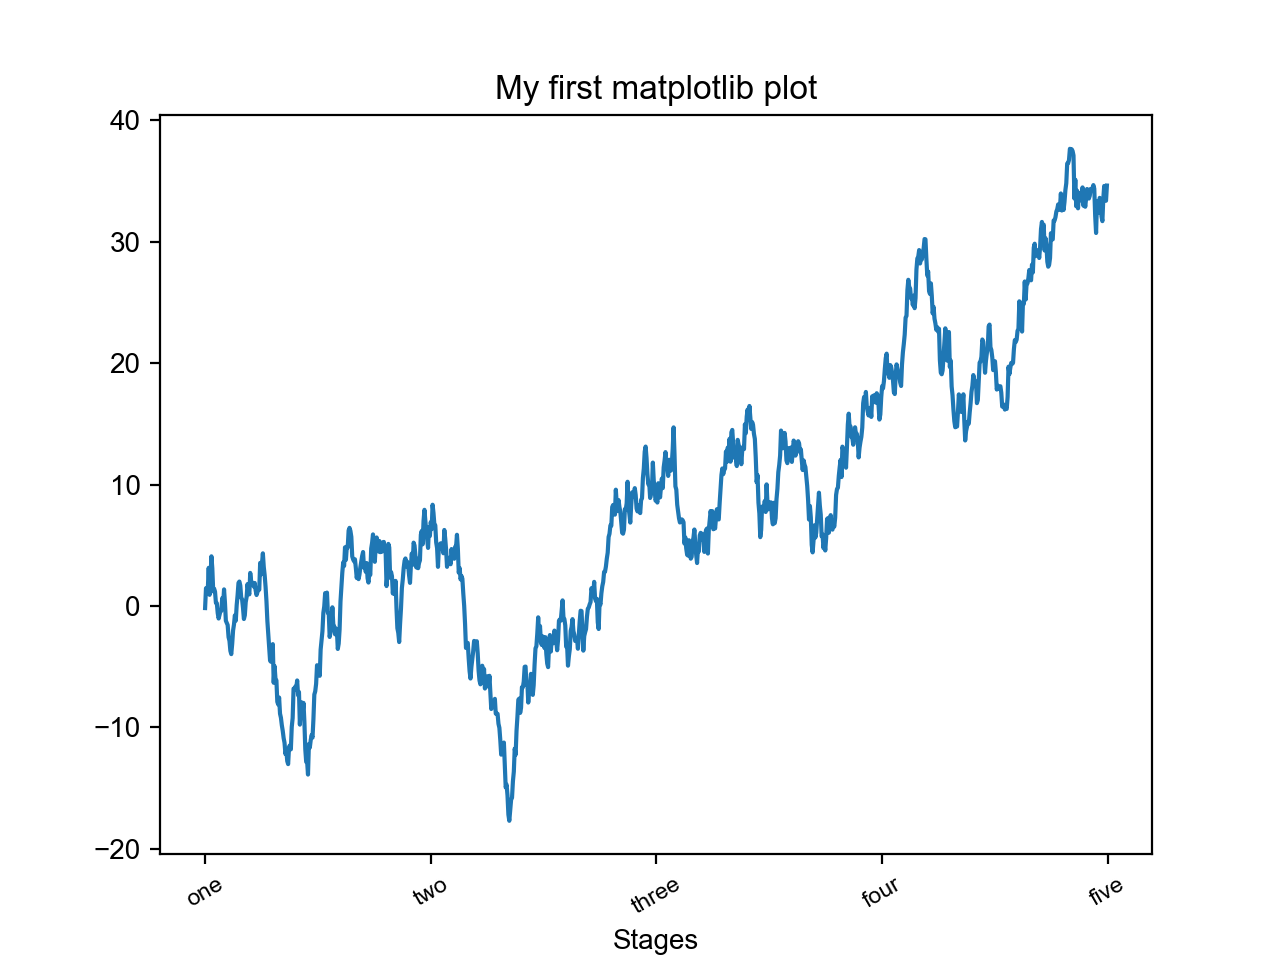

In [26]:
fig = plt.figure()

In [27]:
ax = fig.add_subplot(1, 1, 1)

In [28]:
ax.plot(np.random.randn(1000).cumsum())

In [29]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [30]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [31]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [32]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

In [33]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

#### Adding legends

<IPython.core.display.Javascript object>


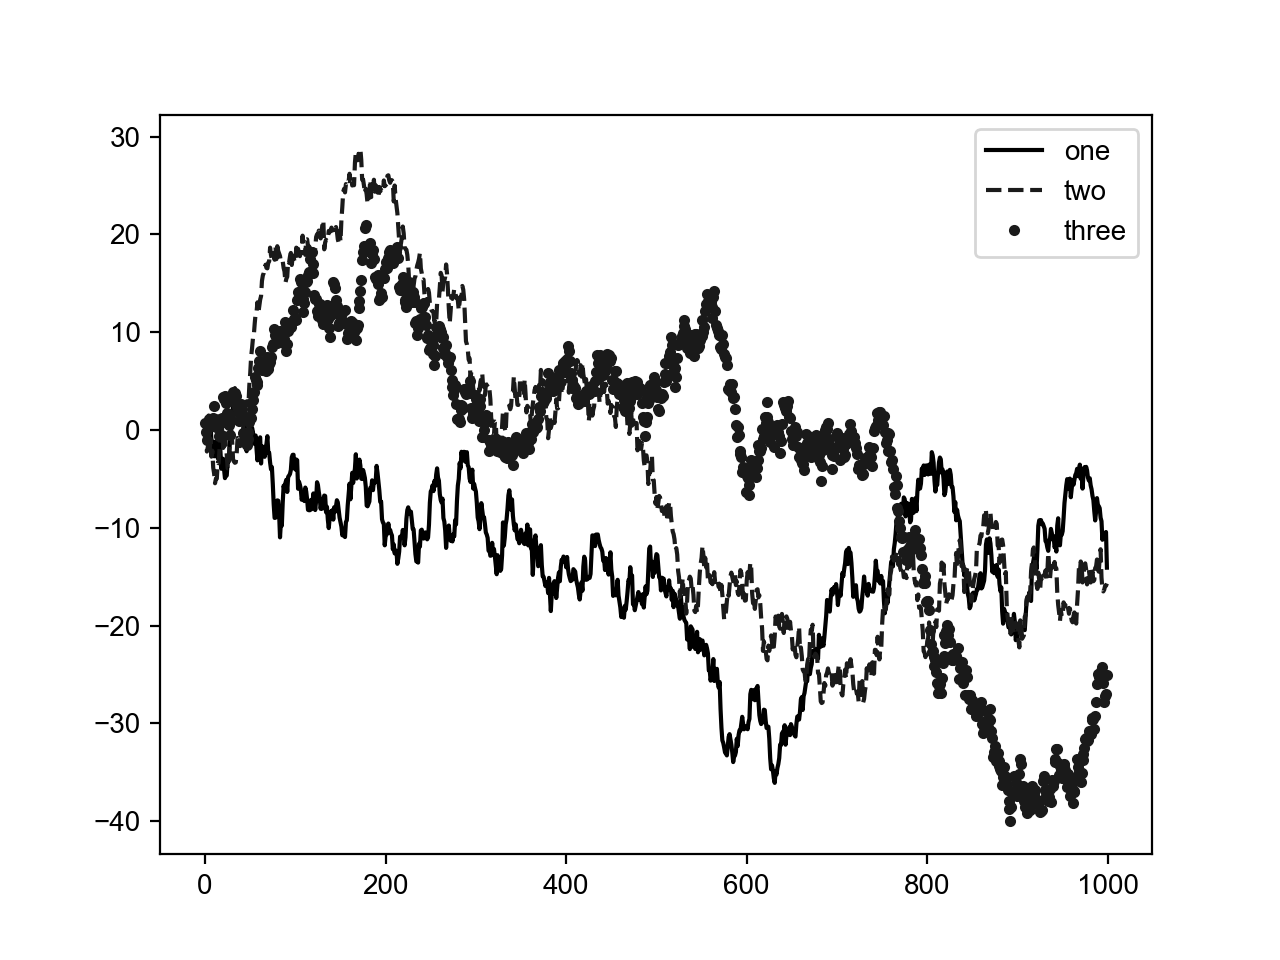

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [35]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [36]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

In [37]:
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

In [38]:
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [39]:
# ax.text(x, y, 'Hello, world!', family='monospace', fontsize=10)

<IPython.core.display.Javascript object>


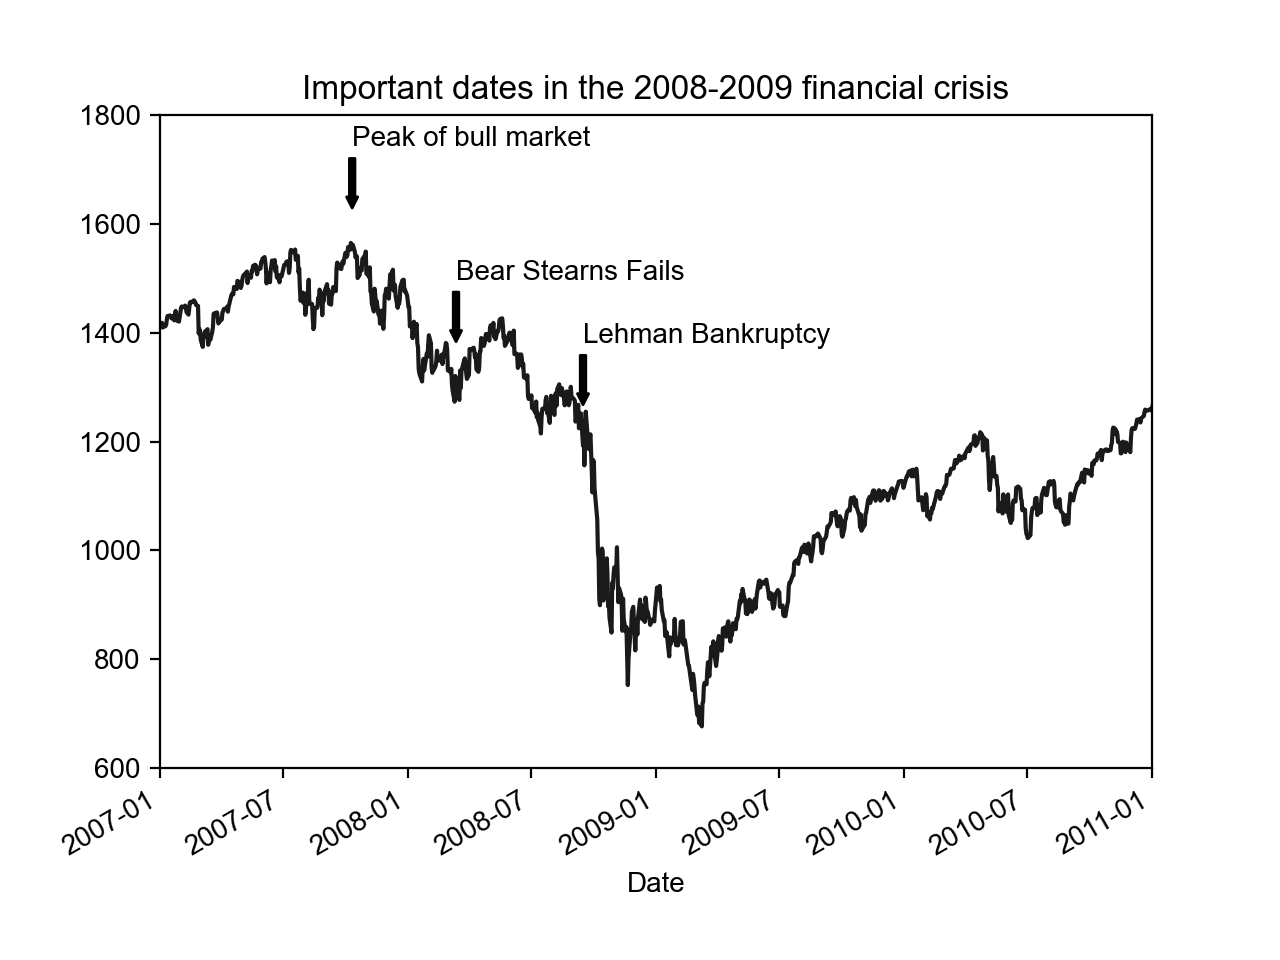

In [40]:
fig = plt.figure()

In [41]:
ax = fig.add_subplot(1, 1, 1)

In [42]:
data = pd.read_csv('src/csv/SPX.csv', index_col=0, parse_dates=True)
spx = data['SPX']

In [43]:
spx.plot(ax=ax, style='k-')

<AxesSubplot:xlabel='Date'>

In [44]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [45]:
for date, label in crisis_data:
    ax.annotate(
        label, 
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength= 4),
        horizontalalignment='left',
        verticalalignment='top'
    )

In [46]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


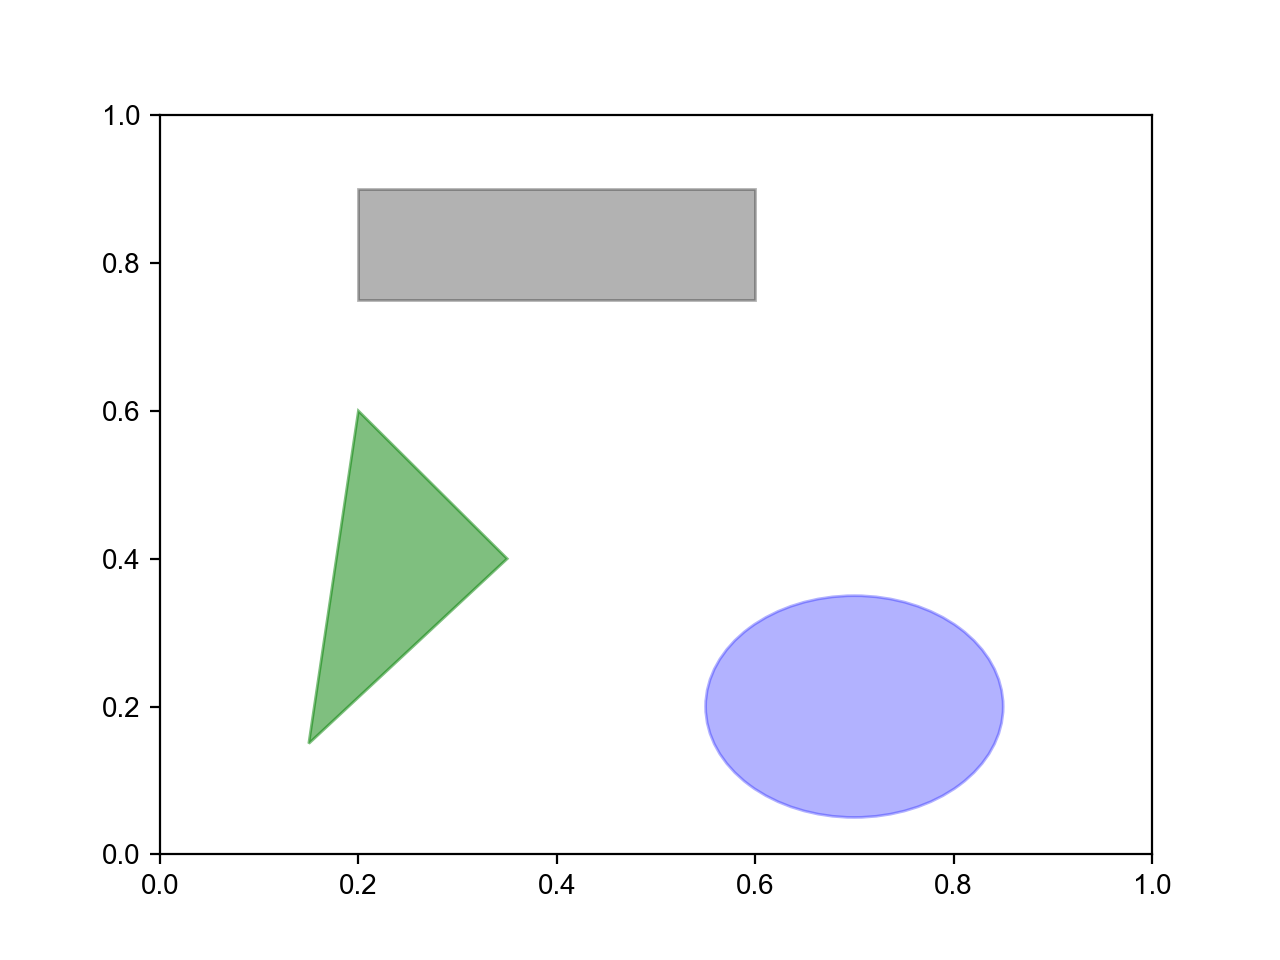

In [47]:
fig = plt.figure()

In [48]:
ax = fig.add_subplot(1, 1, 1)

In [49]:
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

In [50]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [51]:
# plt.savefig('figpath.svg')
# plt.savefig('figpath.svg', dpi=400, bbox_inches='tight')

In [52]:
"""
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()
"""

'\nbuffer = BytesIO()\nplt.savefig(buffer)\nplot_data = buffer.getvalue()\n'

### matplotlib Configuration

In [53]:
# plt.rc('figure', figsize=(10, 10))

In [54]:
"""
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small',
}

plt.rc('font', **font_options)
"""

"\nfont_options = {\n    'family': 'monospace',\n    'weight': 'bold',\n    'size': 'small',\n}\n\nplt.rc('font', **font_options)\n"

## 9.2 Plotting with pandas and seaborn

### Line Plots

<IPython.core.display.Javascript object>


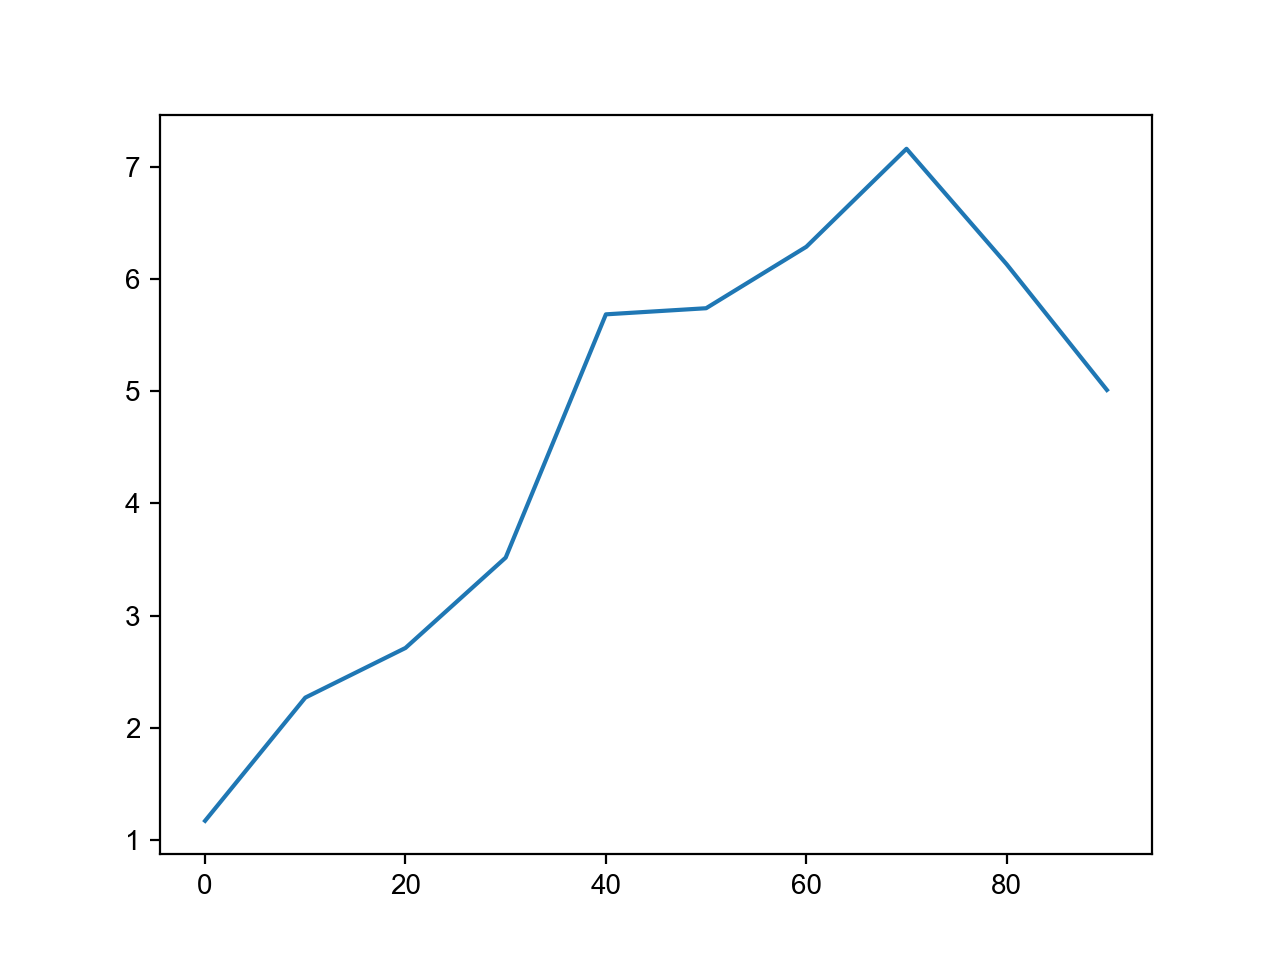

In [55]:
fig = plt.figure()

In [56]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [57]:
s.plot()

<AxesSubplot:>

In [58]:
df = pd.DataFrame(
    np.random.randn(10, 4).cumsum(0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10)
)

<IPython.core.display.Javascript object>


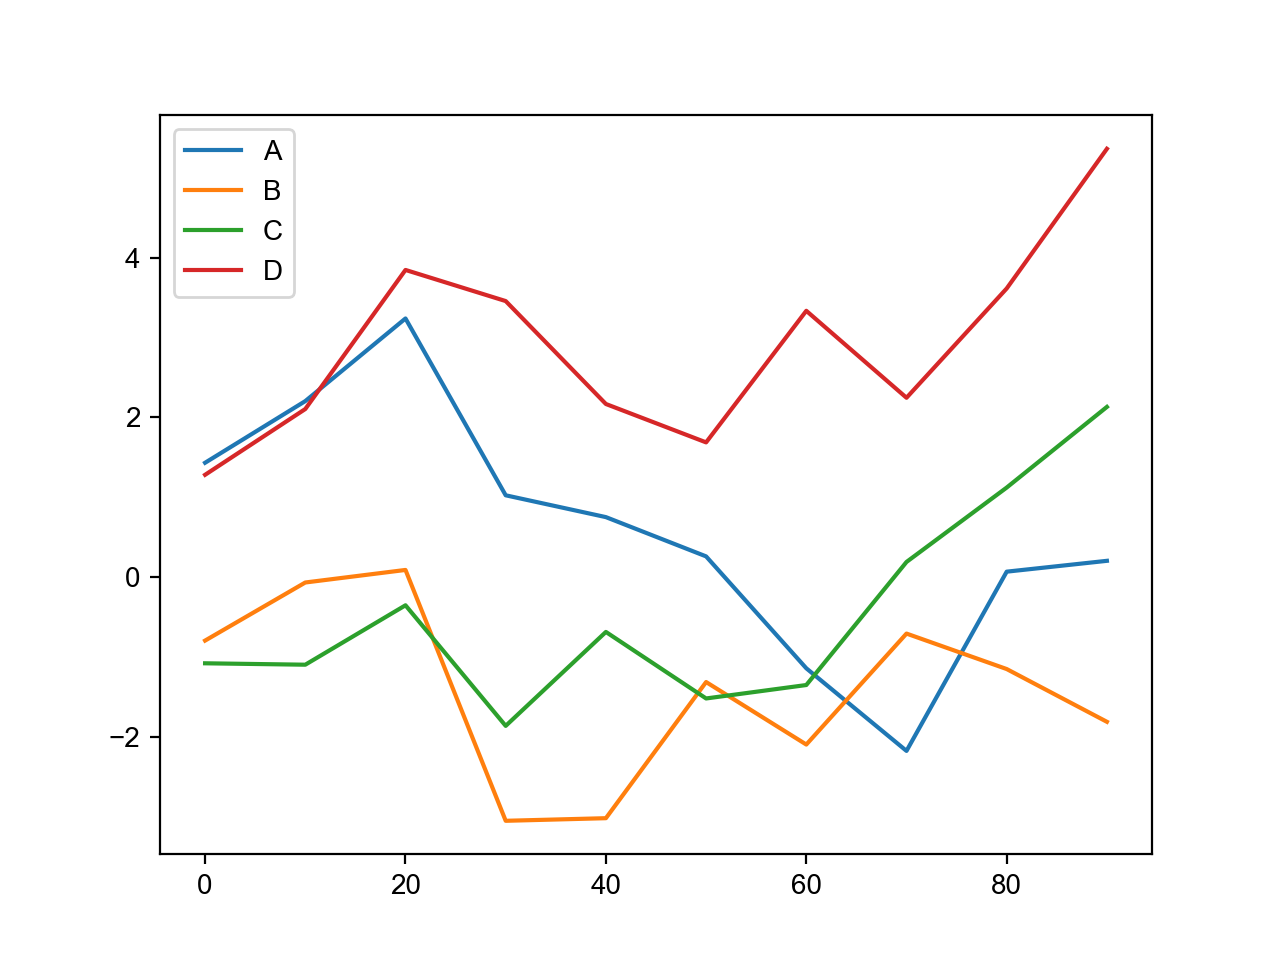

<AxesSubplot:>

In [59]:
df.plot()

##### Series.plot method arguments

| Argument | Description |
| - | - |
| label | Label for plot legend |
| ax | matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot |
| style | Style string, like 'ko--', to be passed to matplotlib |
| alpha | The plot fill opacity (from 0 to 1) |
| kind | Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie' |
| logy | Use logarithmic scaling on the y-axis |
| use_index | Use the object index for tick labels |
| rot | Rotation of tick labels (0 through 360) |
| xticks | Values to use for x-axis ticks |
| yticks | Values to use for y-axis ticks |
| xlim | x-axis limits (e.g., [0, 10]) |
| ylim | y-axis limits (e.g., [0, 10]) |
| grid | Display axis grid (on by default) |

##### DataFrame-specific plot arguments

| Argument | Description |
| - | - |
| subplots | Plot each DataFrame column in a separate subplot |
| sharex | If subplots=True, share the same x-axis, linking ticks and limits |
| sharey | Ifsubplots=True, share the same y-axis |
| figsize | Size of figure to create as tuple |
| title | Plot title as string |
| legend | Add a subplot legend (Trueby default) |
| sort_columns | Plot columns in alphabetical order; by default uses existing column order |

### Bar Plots

<IPython.core.display.Javascript object>


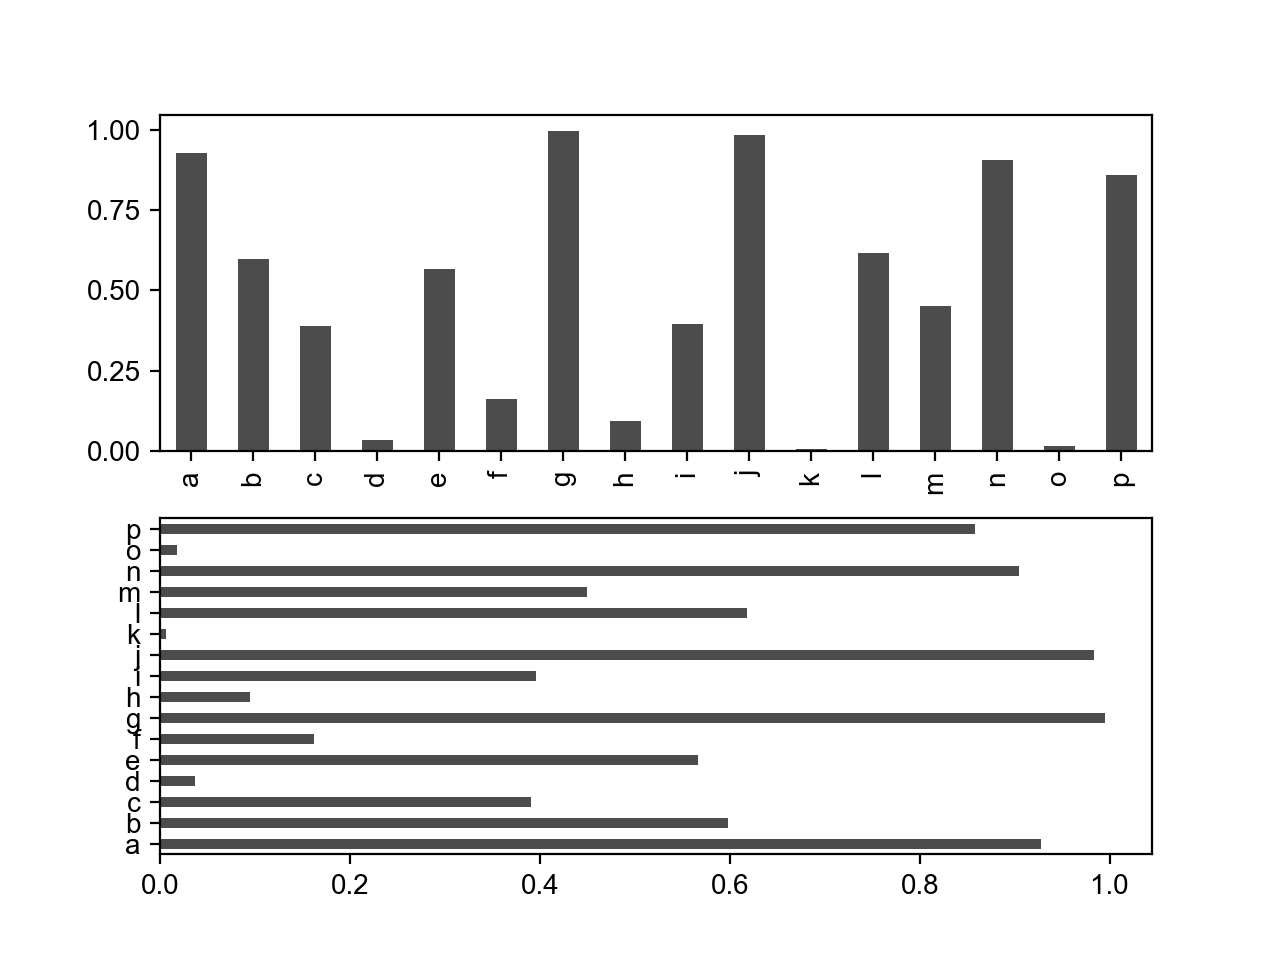

In [60]:
fig, axes = plt.subplots(2, 1)

In [61]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [62]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

In [63]:
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus')
)
df

Genus         A         B         C         D
one    0.815522  0.984996  0.789212  0.984949
two    0.359175  0.264507  0.373024  0.254887
three  0.950684  0.696543  0.462334  0.902073
four   0.693608  0.028276  0.981006  0.988238
five   0.283653  0.952790  0.391232  0.160211
six    0.524785  0.214279  0.689300  0.820608

<IPython.core.display.Javascript object>


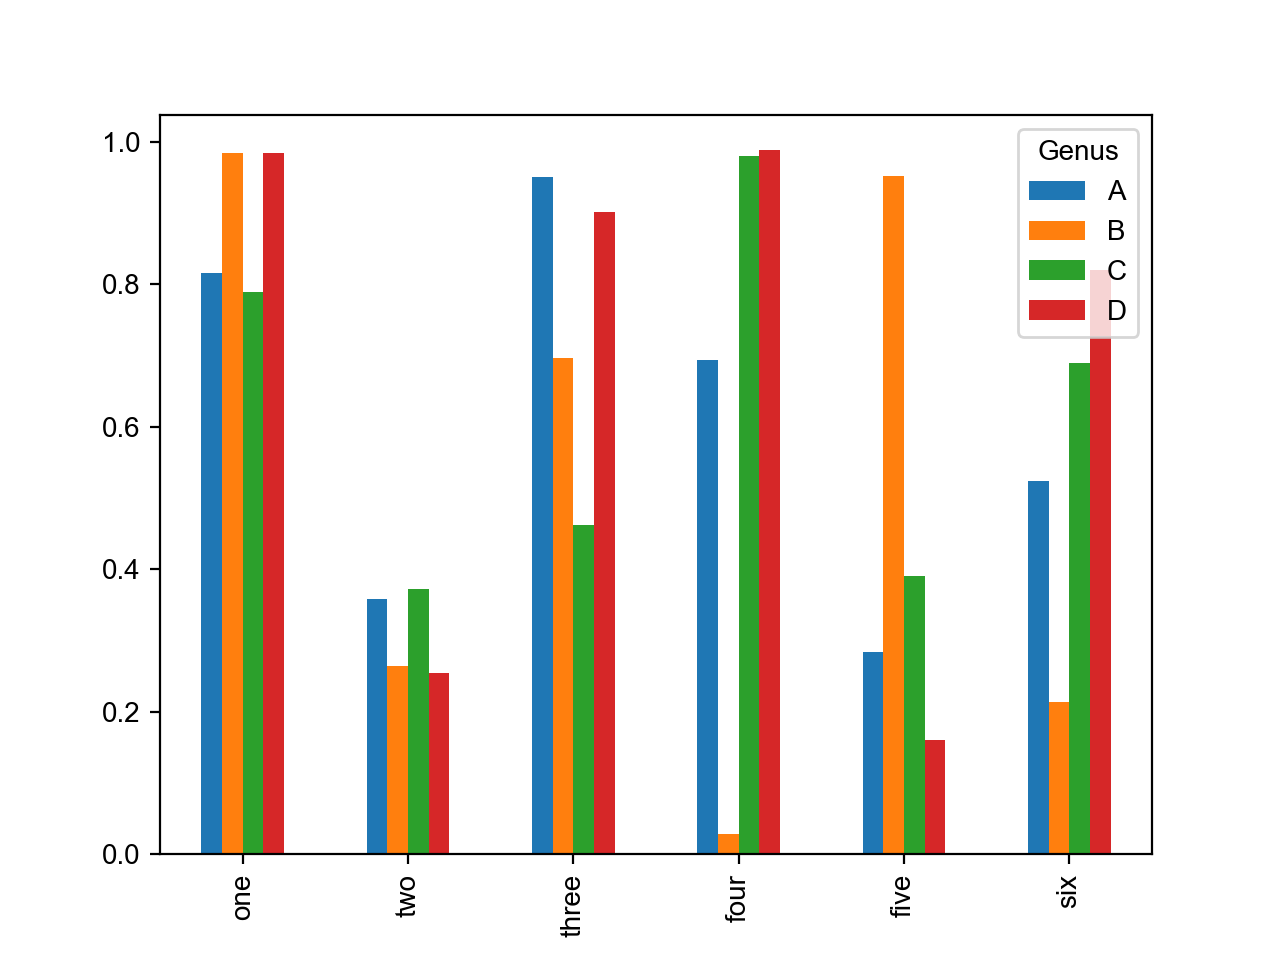

<AxesSubplot:>

In [64]:
df.plot.bar()

<IPython.core.display.Javascript object>


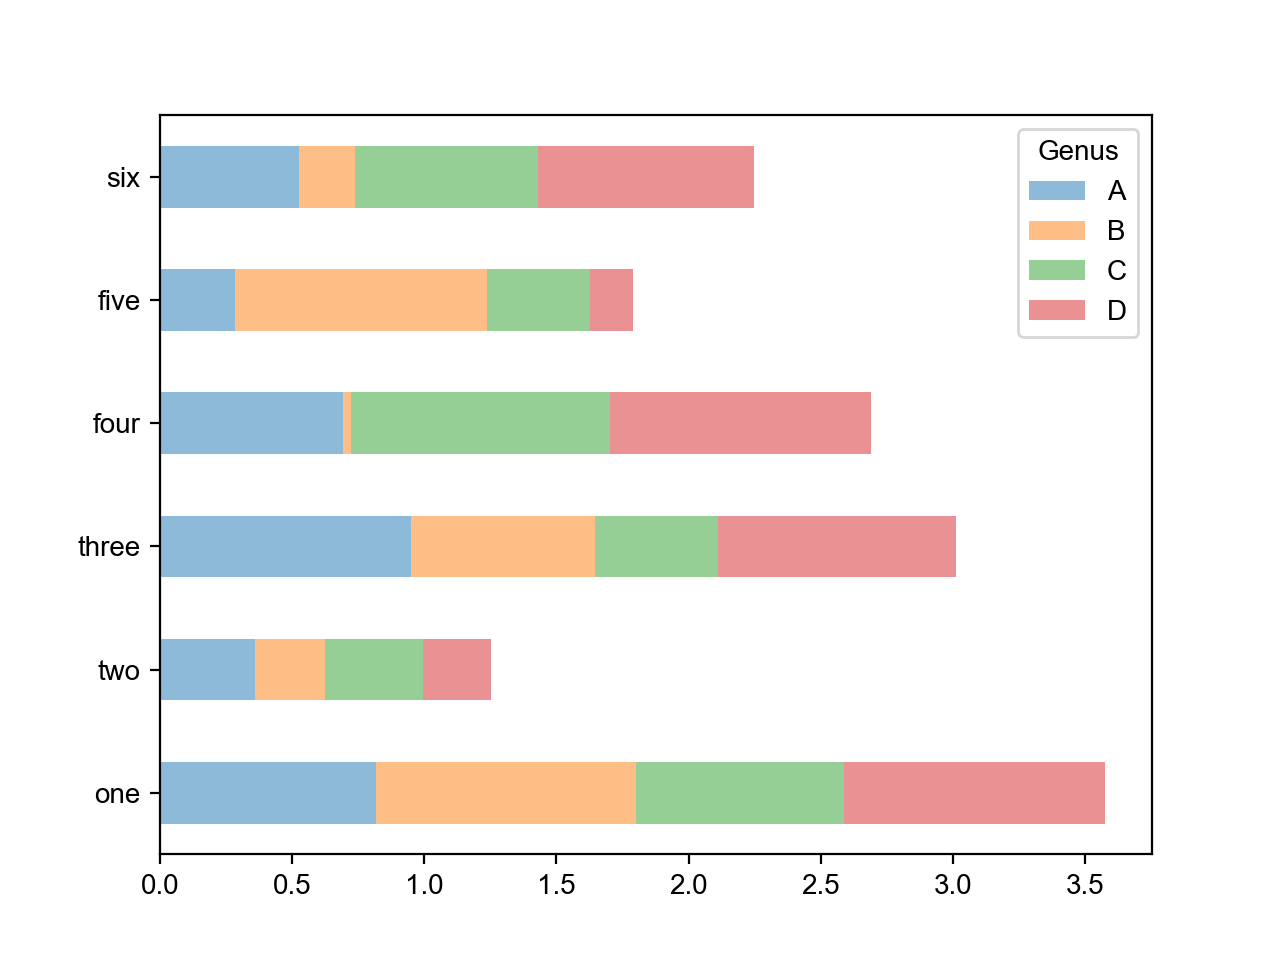

<AxesSubplot:>

In [65]:
df.plot.barh(stacked=True, alpha=0.5)

In [66]:
tips = pd.read_csv('src/csv/tips.csv')

In [67]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size  1   2   3   4  5  6
day                      
Fri   1  16   1   1  0  0
Sat   2  53  18  13  1  0
Sun   0  39  15  18  3  1
Thur  1  48   4   5  1  3

In [68]:
party_counts = party_counts.loc[:, 2:5]

In [69]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size         2         3         4         5
day                                         
Fri   0.888889  0.055556  0.055556  0.000000
Sat   0.623529  0.211765  0.152941  0.011765
Sun   0.520000  0.200000  0.240000  0.040000
Thur  0.827586  0.068966  0.086207  0.017241

<IPython.core.display.Javascript object>


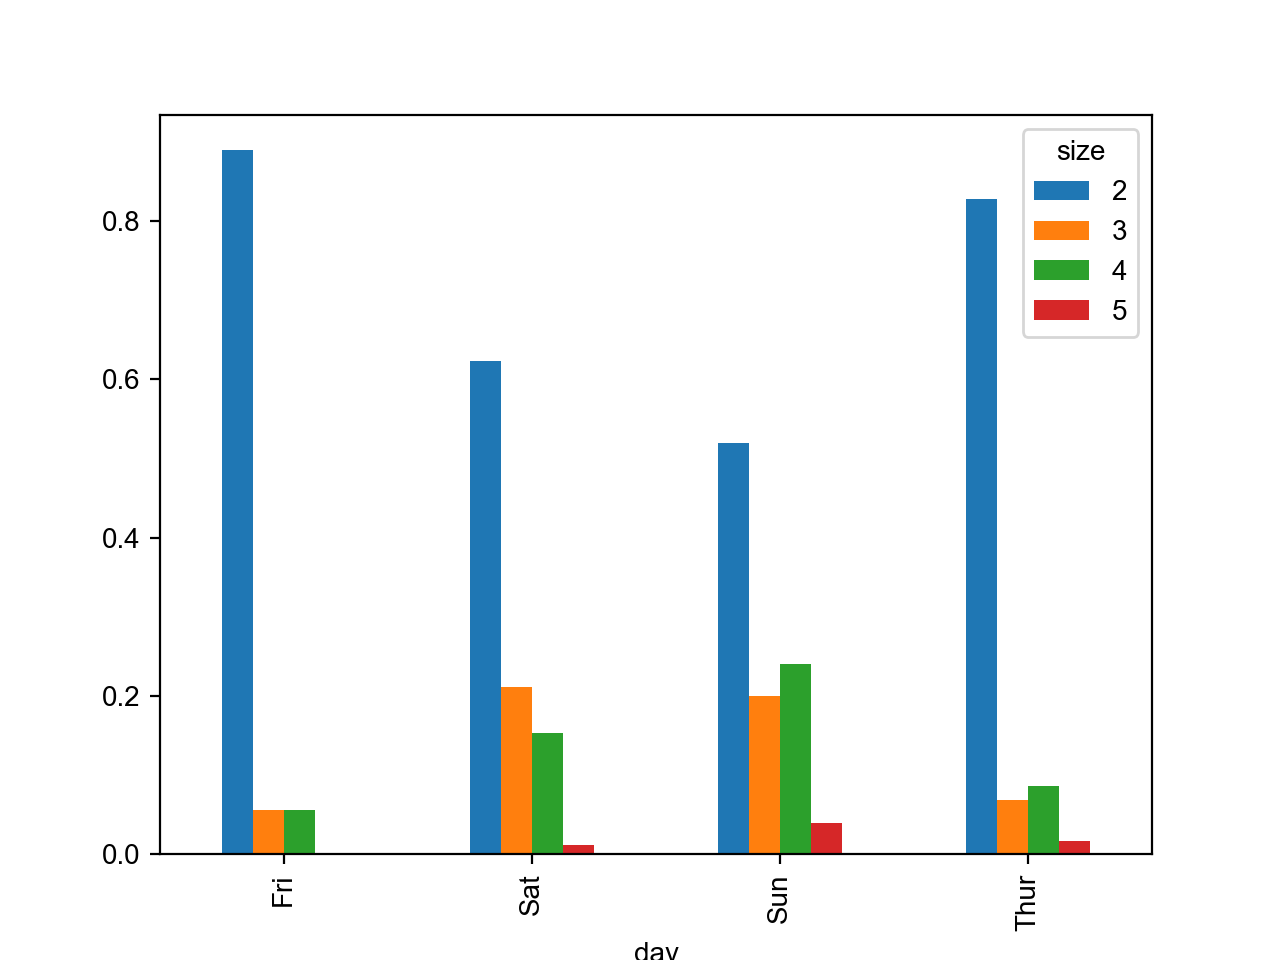

<AxesSubplot:xlabel='day'>

In [70]:
party_pcts.plot.bar()

In [71]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069

<IPython.core.display.Javascript object>


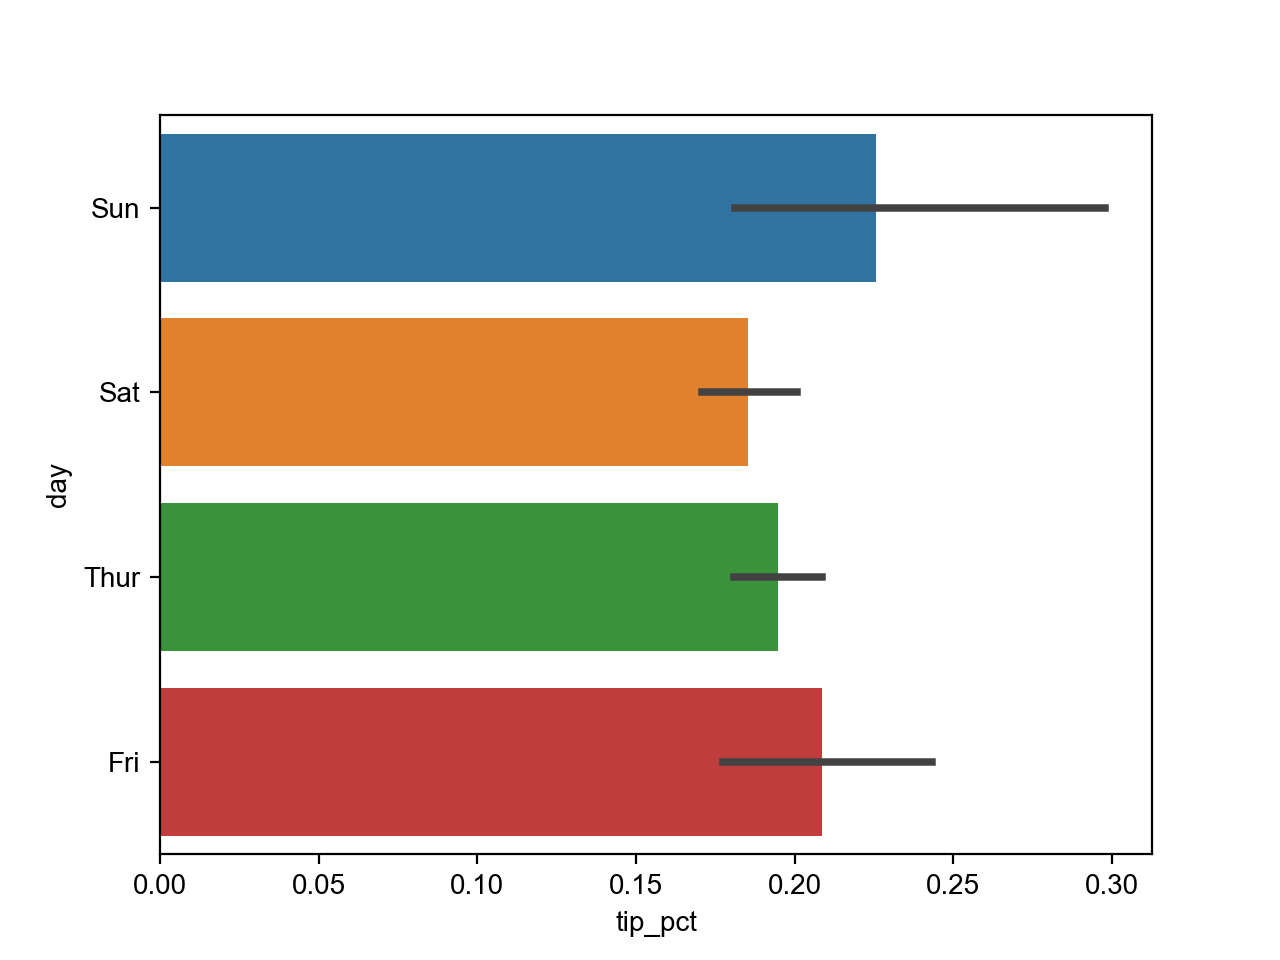

In [72]:
fig = plt.figure()

In [73]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

<IPython.core.display.Javascript object>


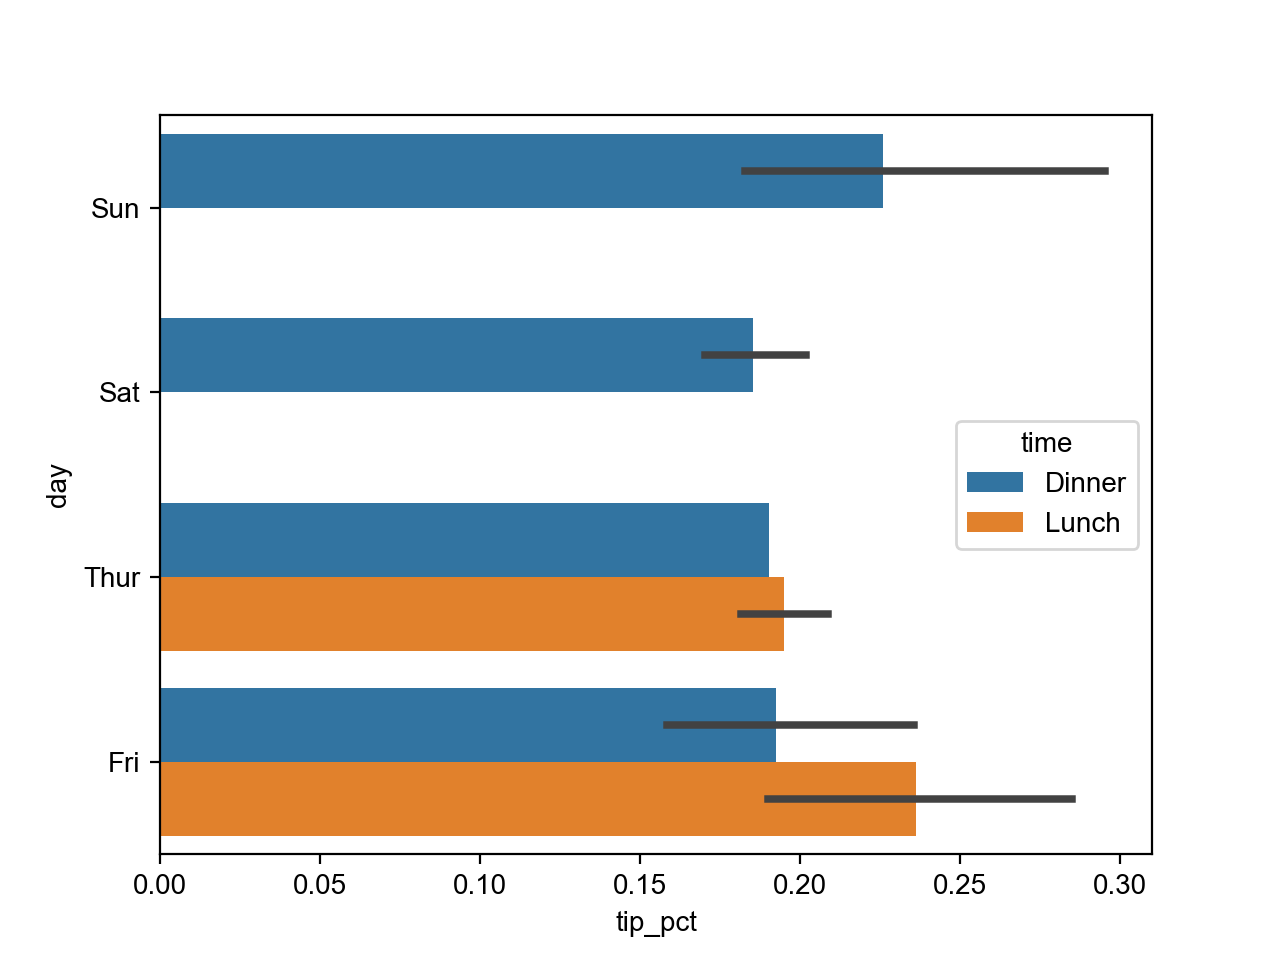

In [74]:
fig = plt.figure()

In [75]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [76]:
sns.set(style="whitegrid")

### Histograms and Desity Plots

<IPython.core.display.Javascript object>


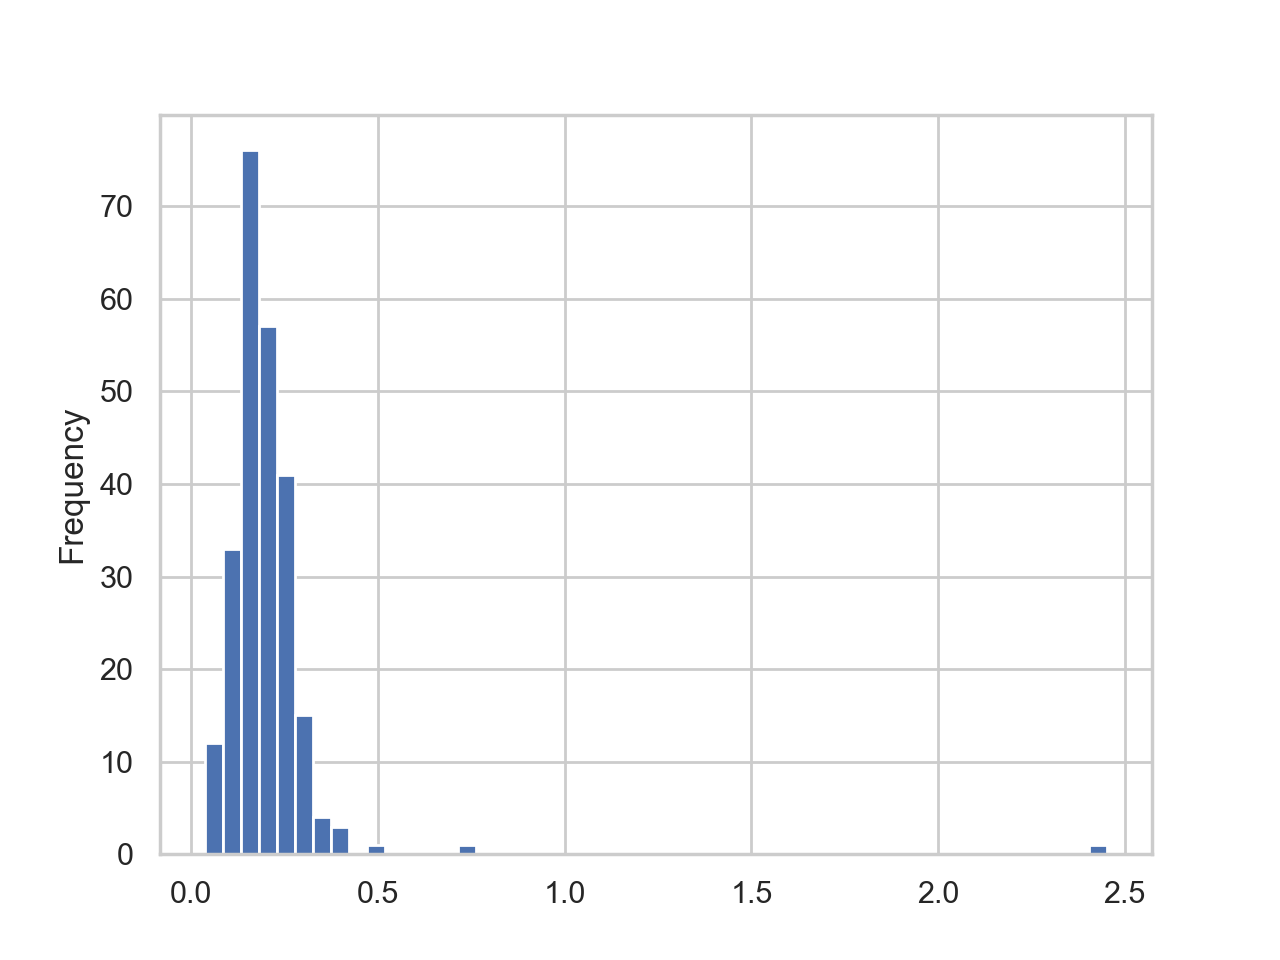

In [77]:
fig = plt.figure()

In [78]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

<IPython.core.display.Javascript object>


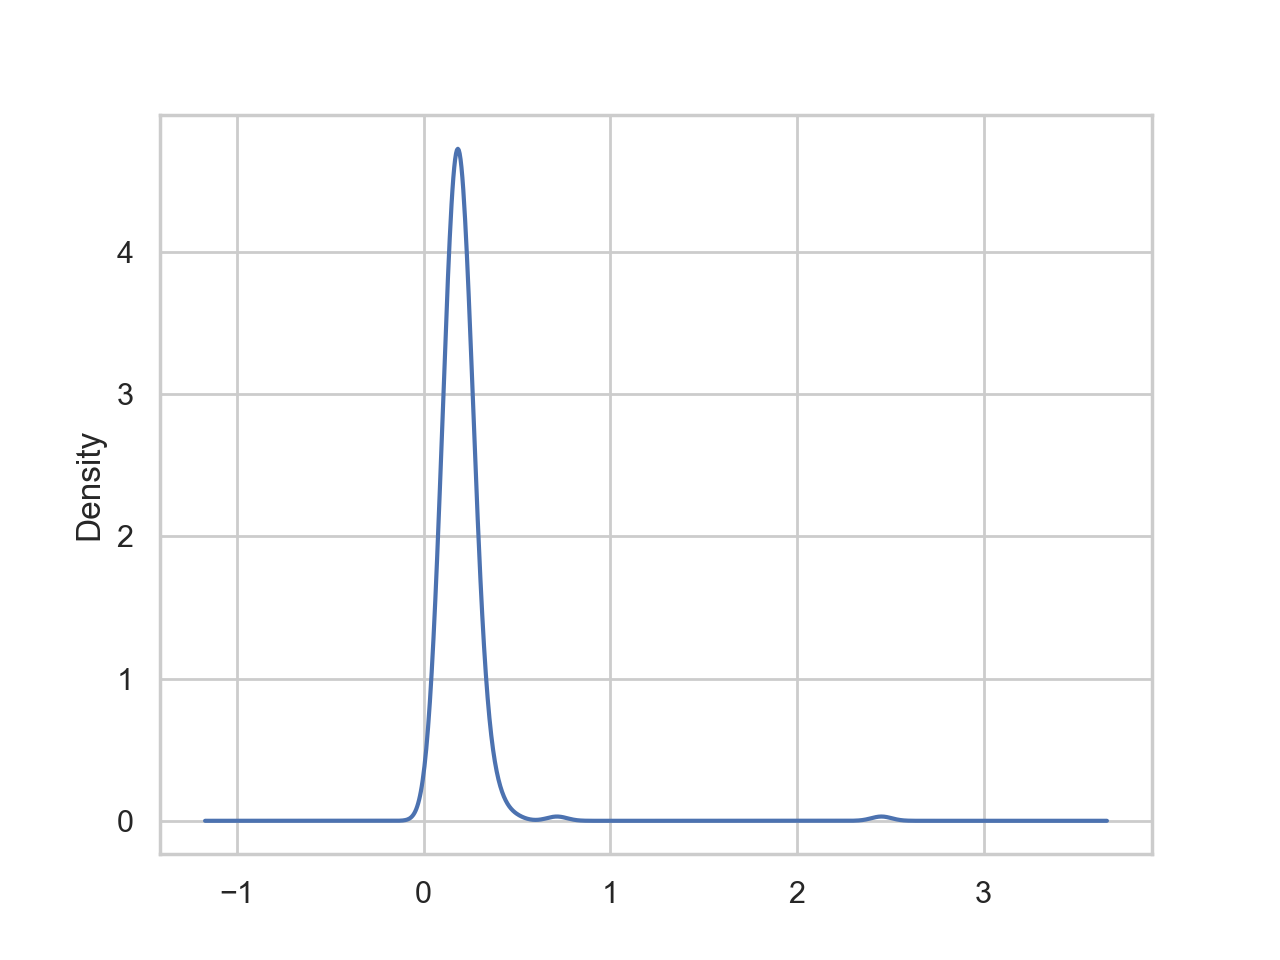

In [79]:
fig = plt.figure()

In [80]:
tips['tip_pct'].plot.density()

<AxesSubplot:ylabel='Density'>

/var/folders/_5/rbp8ycrj4t95c58km4gtz5340000gn/T/ipykernel_11432/1215906531.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


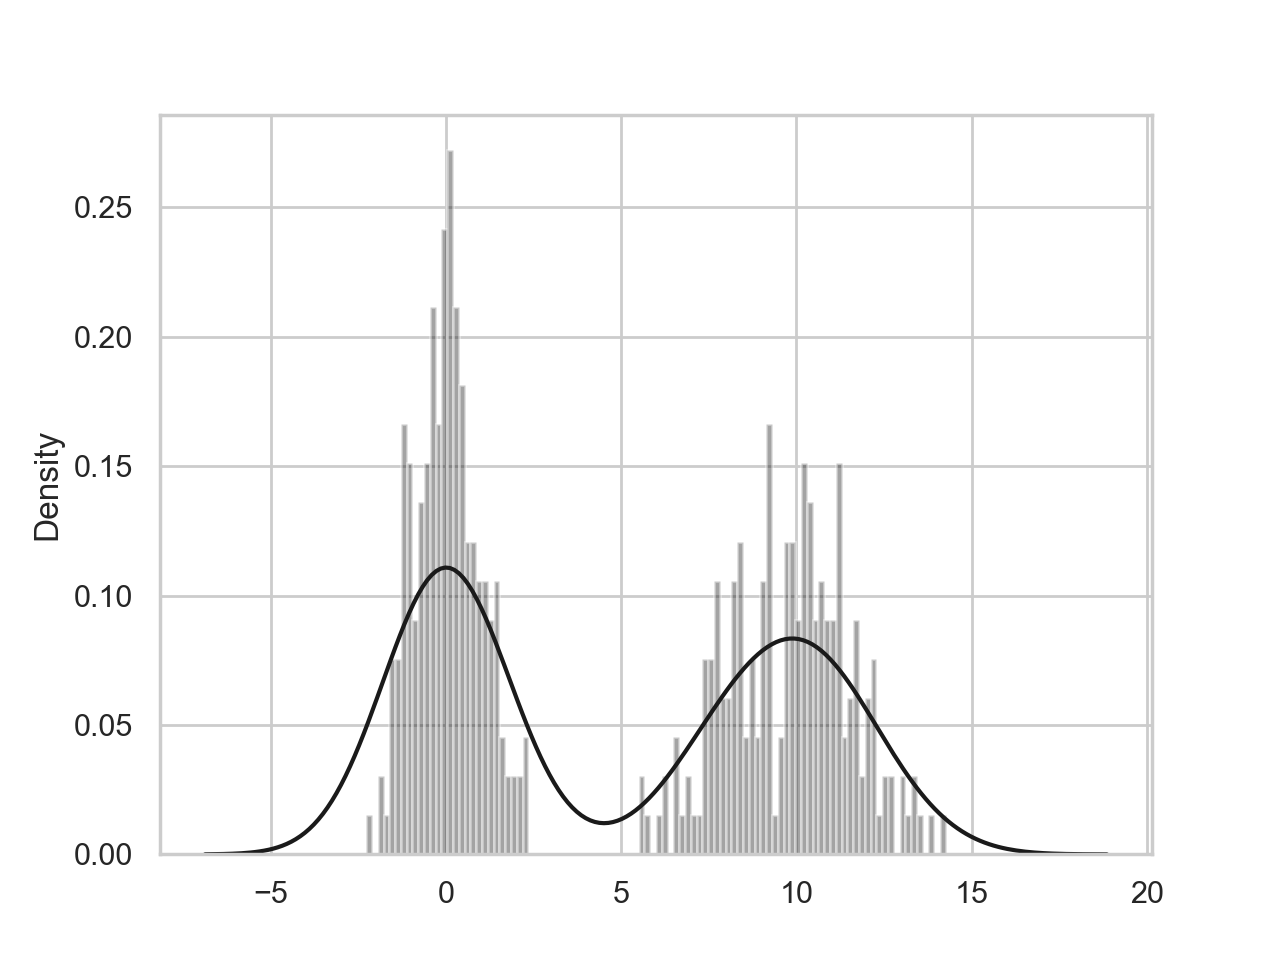

In [81]:
fig = plt.figure()

In [82]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

In [83]:
sns.distplot(values, bins=100, color='k')

/Users/hirotaro.net/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

### Scatter or Point Plots

In [84]:
macro = pd.read_csv('src/csv/macrodata.csv')

In [85]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [86]:
trans_data = np.log(data).diff().dropna()

In [87]:
trans_data[-5:]

cpi        m1  tbilrate     unemp
198 -0.007904  0.045361 -0.396881  0.105361
199 -0.021979  0.066753 -2.277267  0.139762
200  0.002340  0.010286  0.606136  0.160343
201  0.008419  0.037461 -0.200671  0.127339
202  0.008894  0.012202 -0.405465  0.042560

<IPython.core.display.Javascript object>


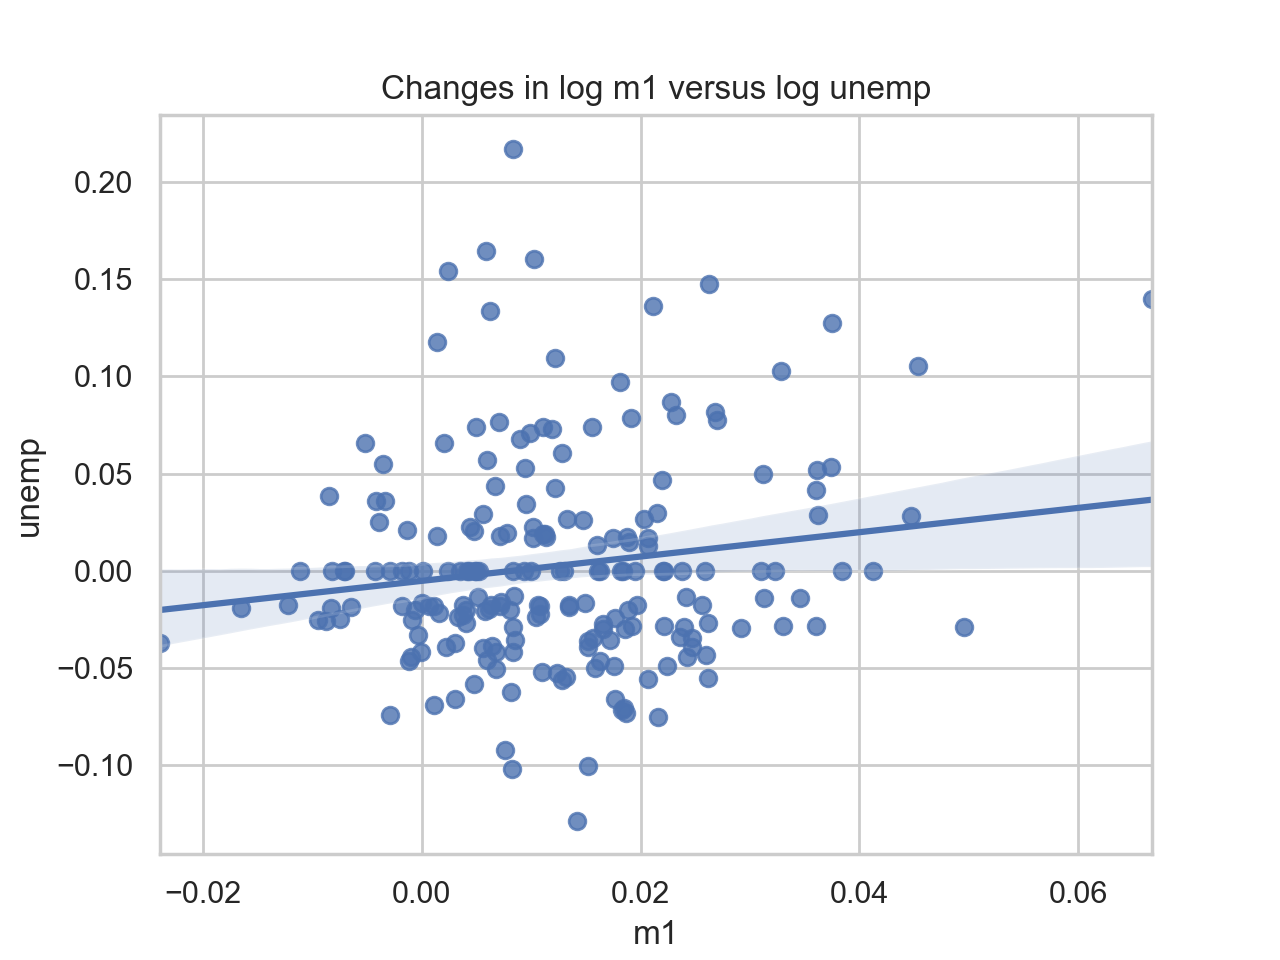

In [88]:
fig = plt.figure()

In [89]:
sns.regplot('m1', 'unemp', data=trans_data)

/Users/hirotaro.net/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [90]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


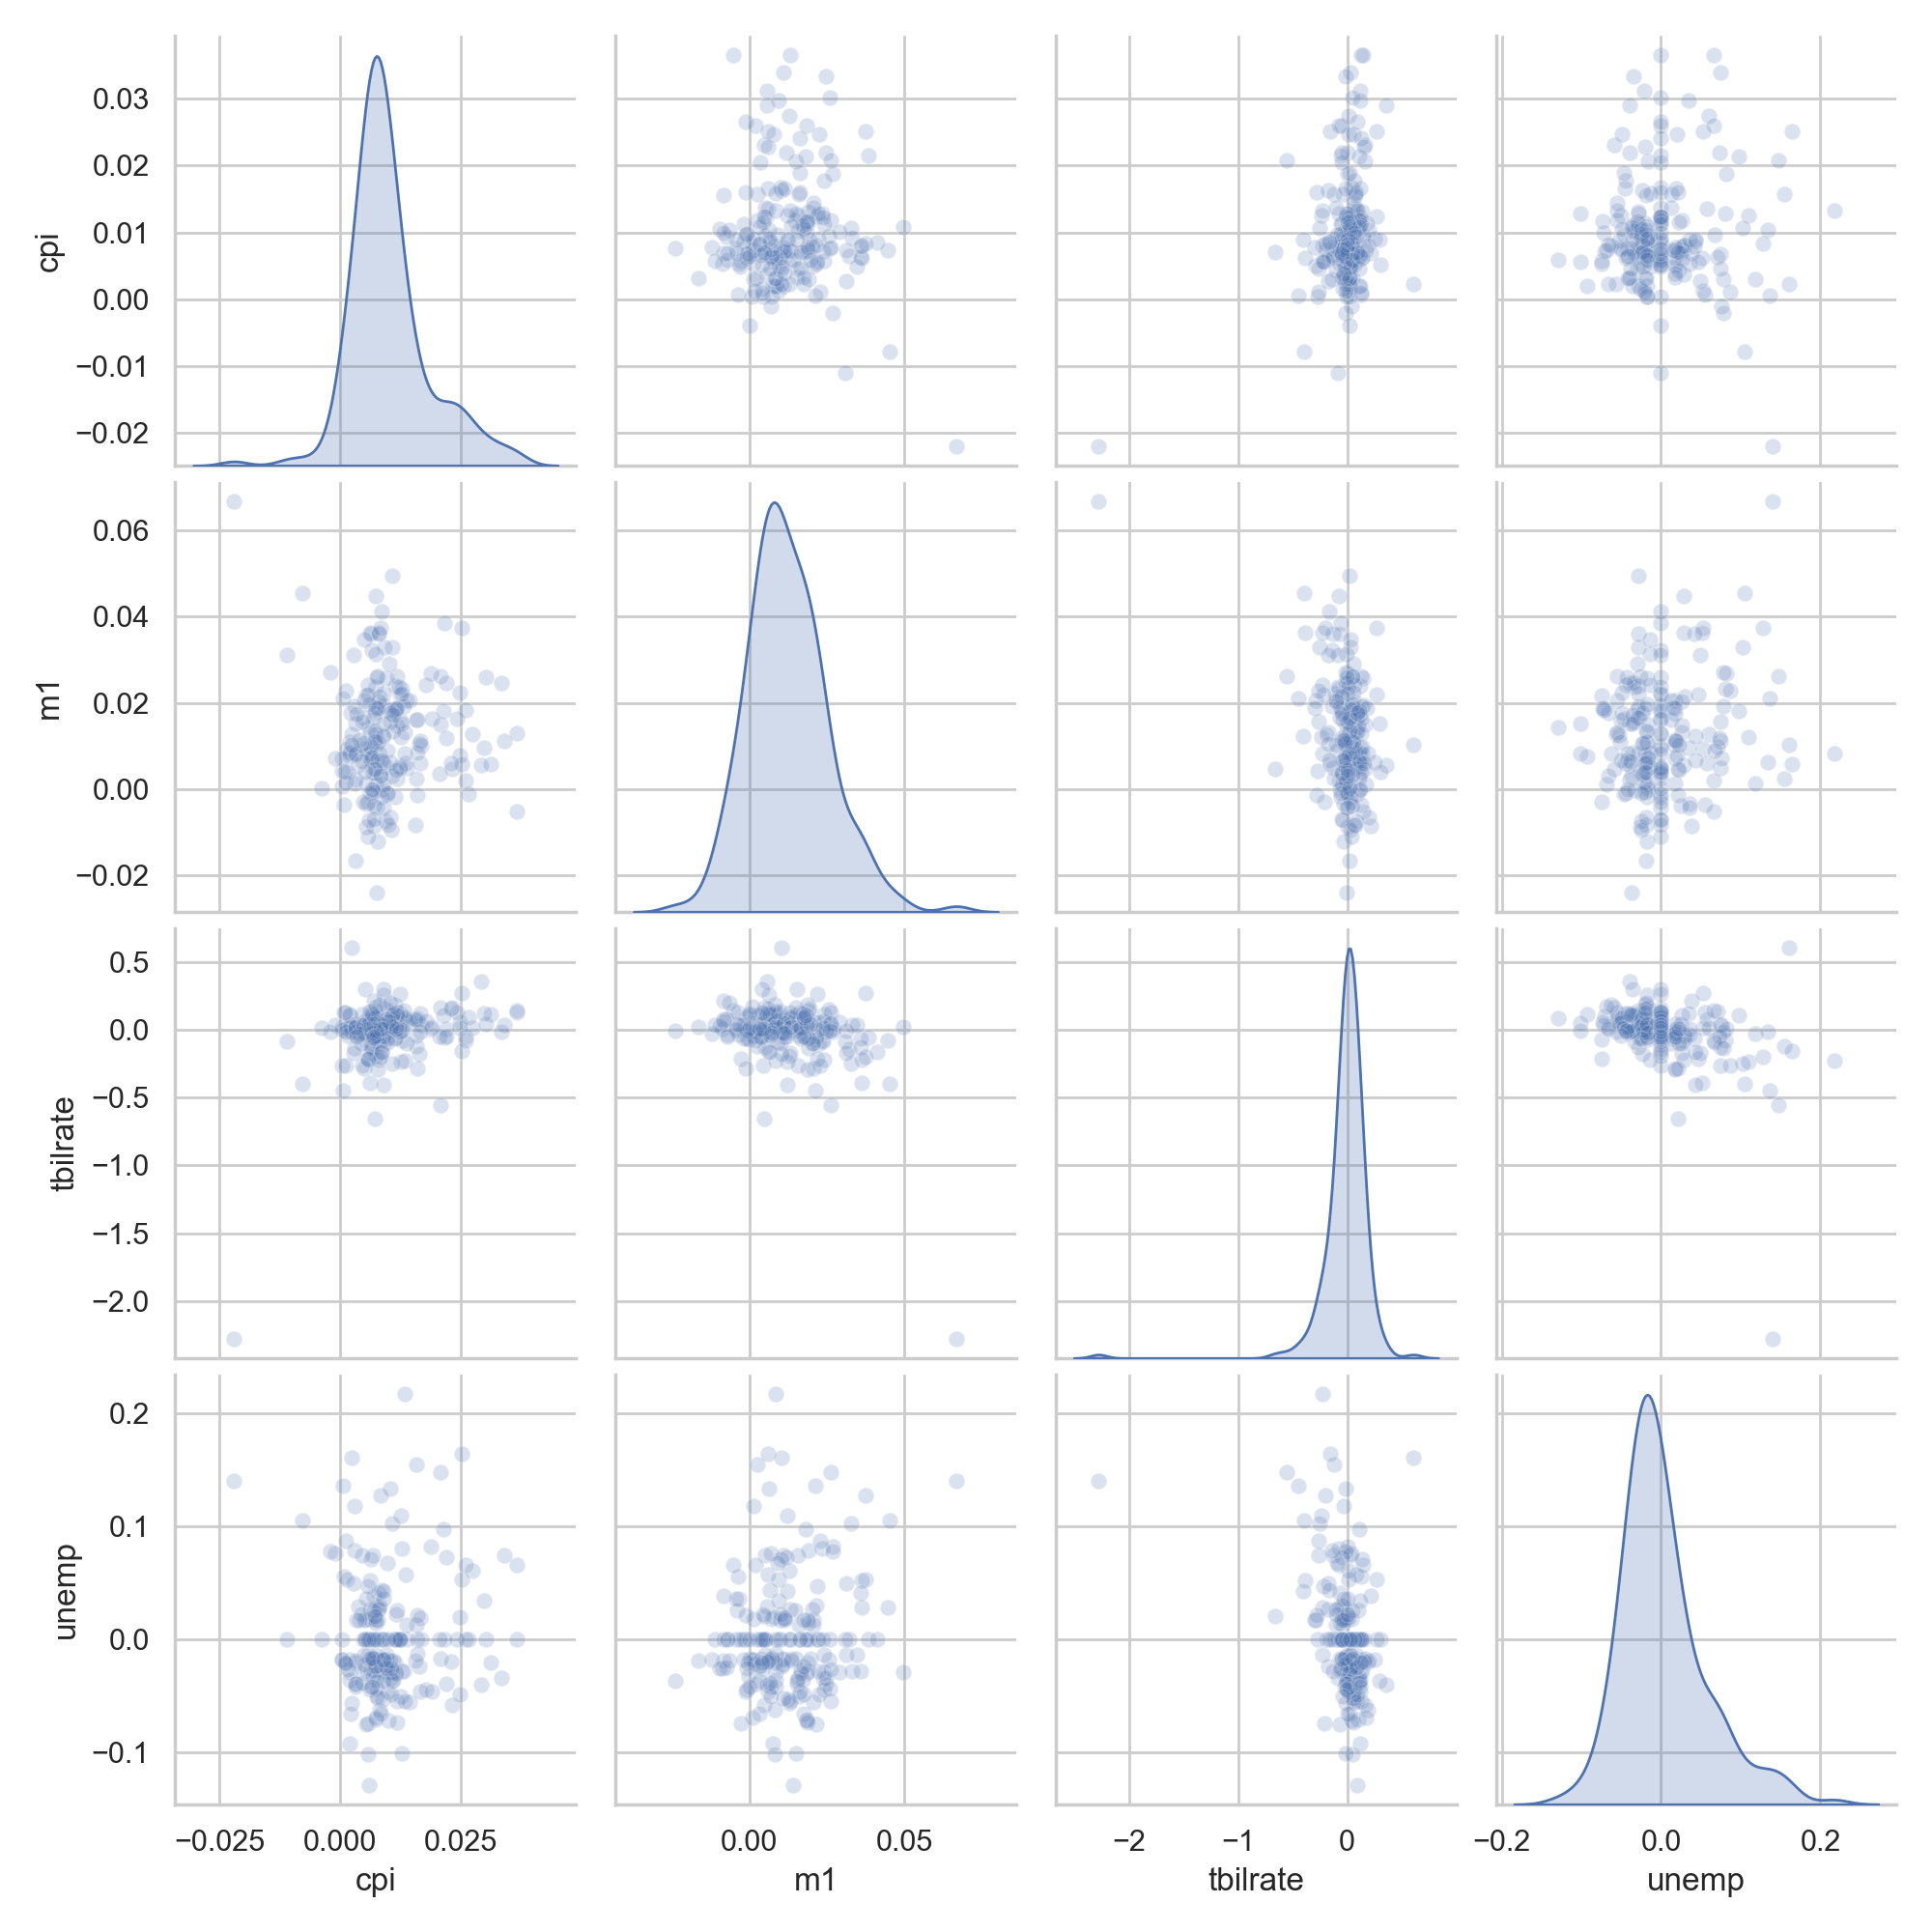

In [91]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

<IPython.core.display.Javascript object>


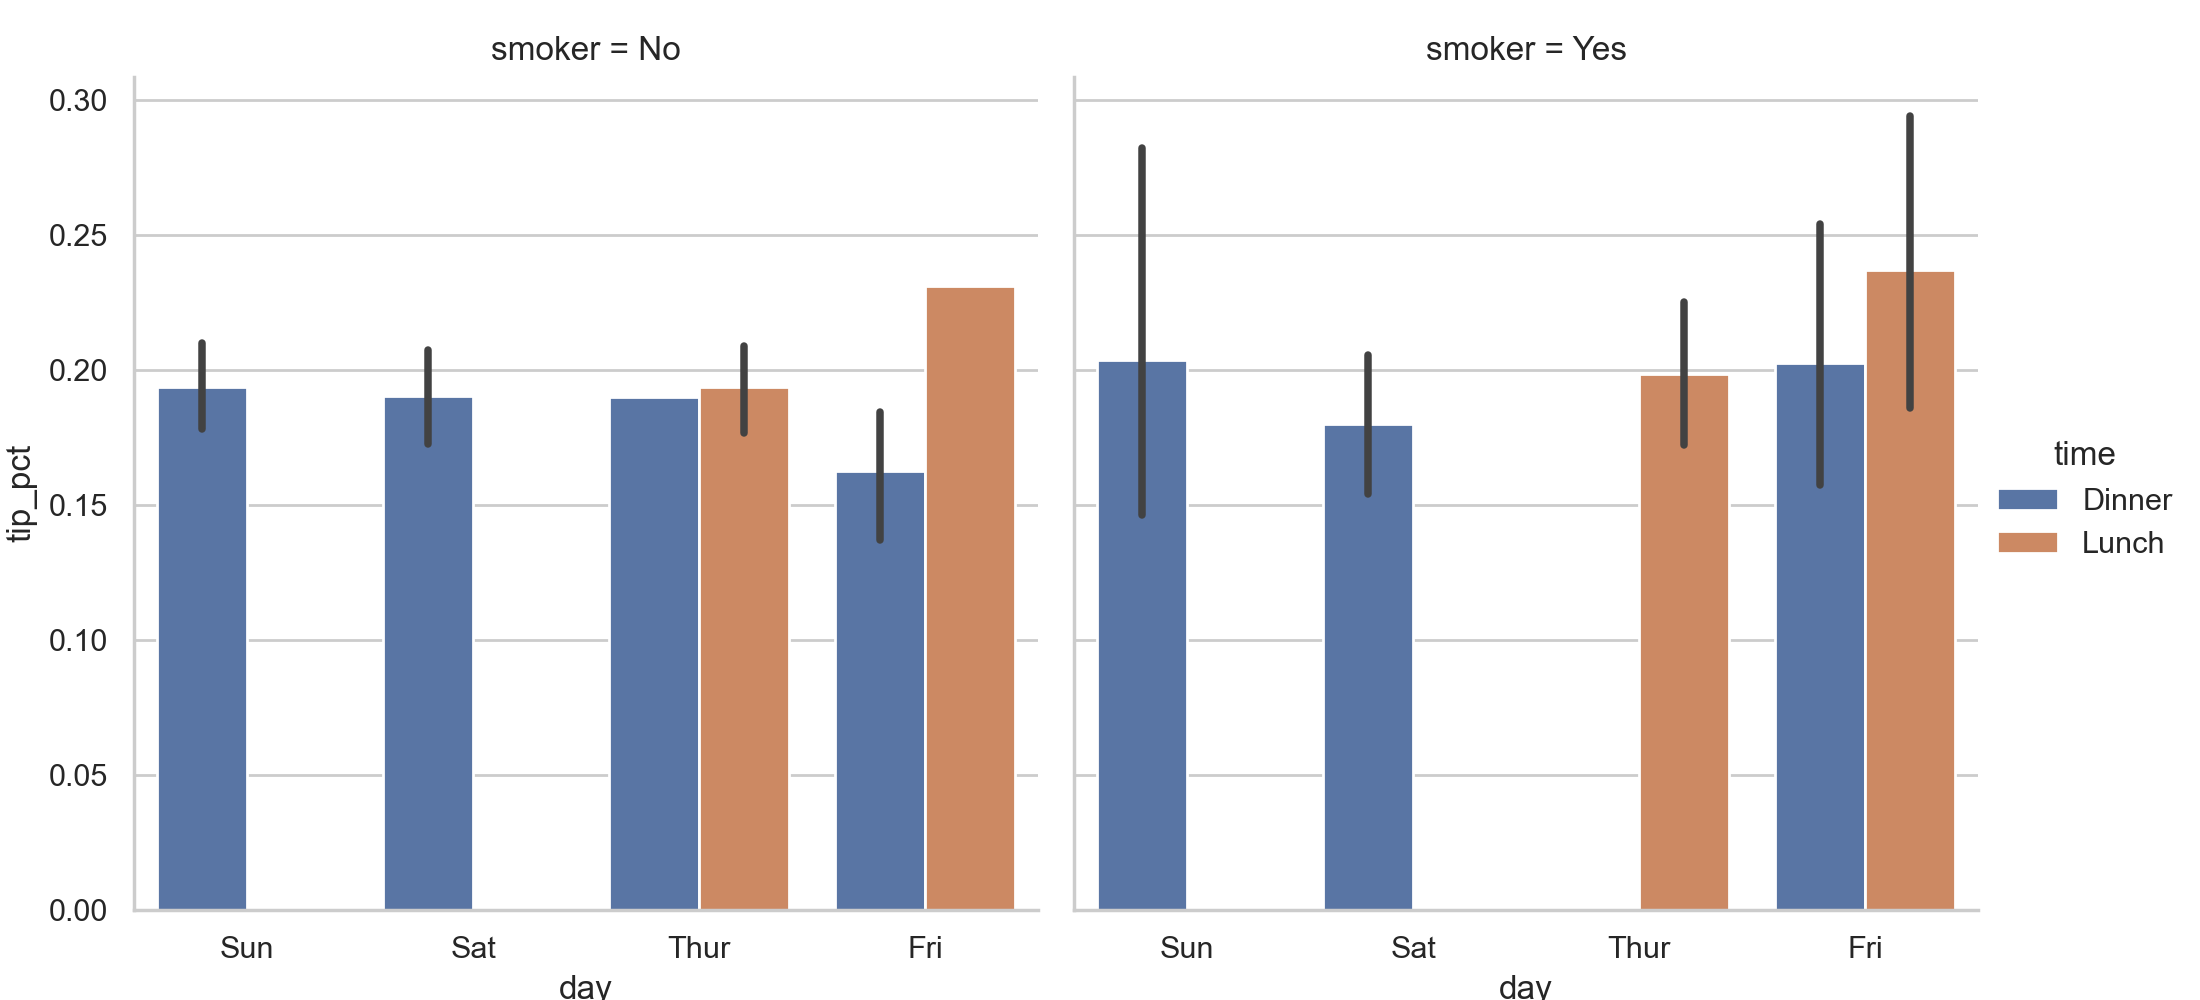

In [93]:
sns.factorplot(
    x='day',
    y='tip_pct',
    hue='time',
    col='smoker',
    kind='bar',
    data=tips[tips.tip_pct < 1]
)

/Users/hirotaro.net/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


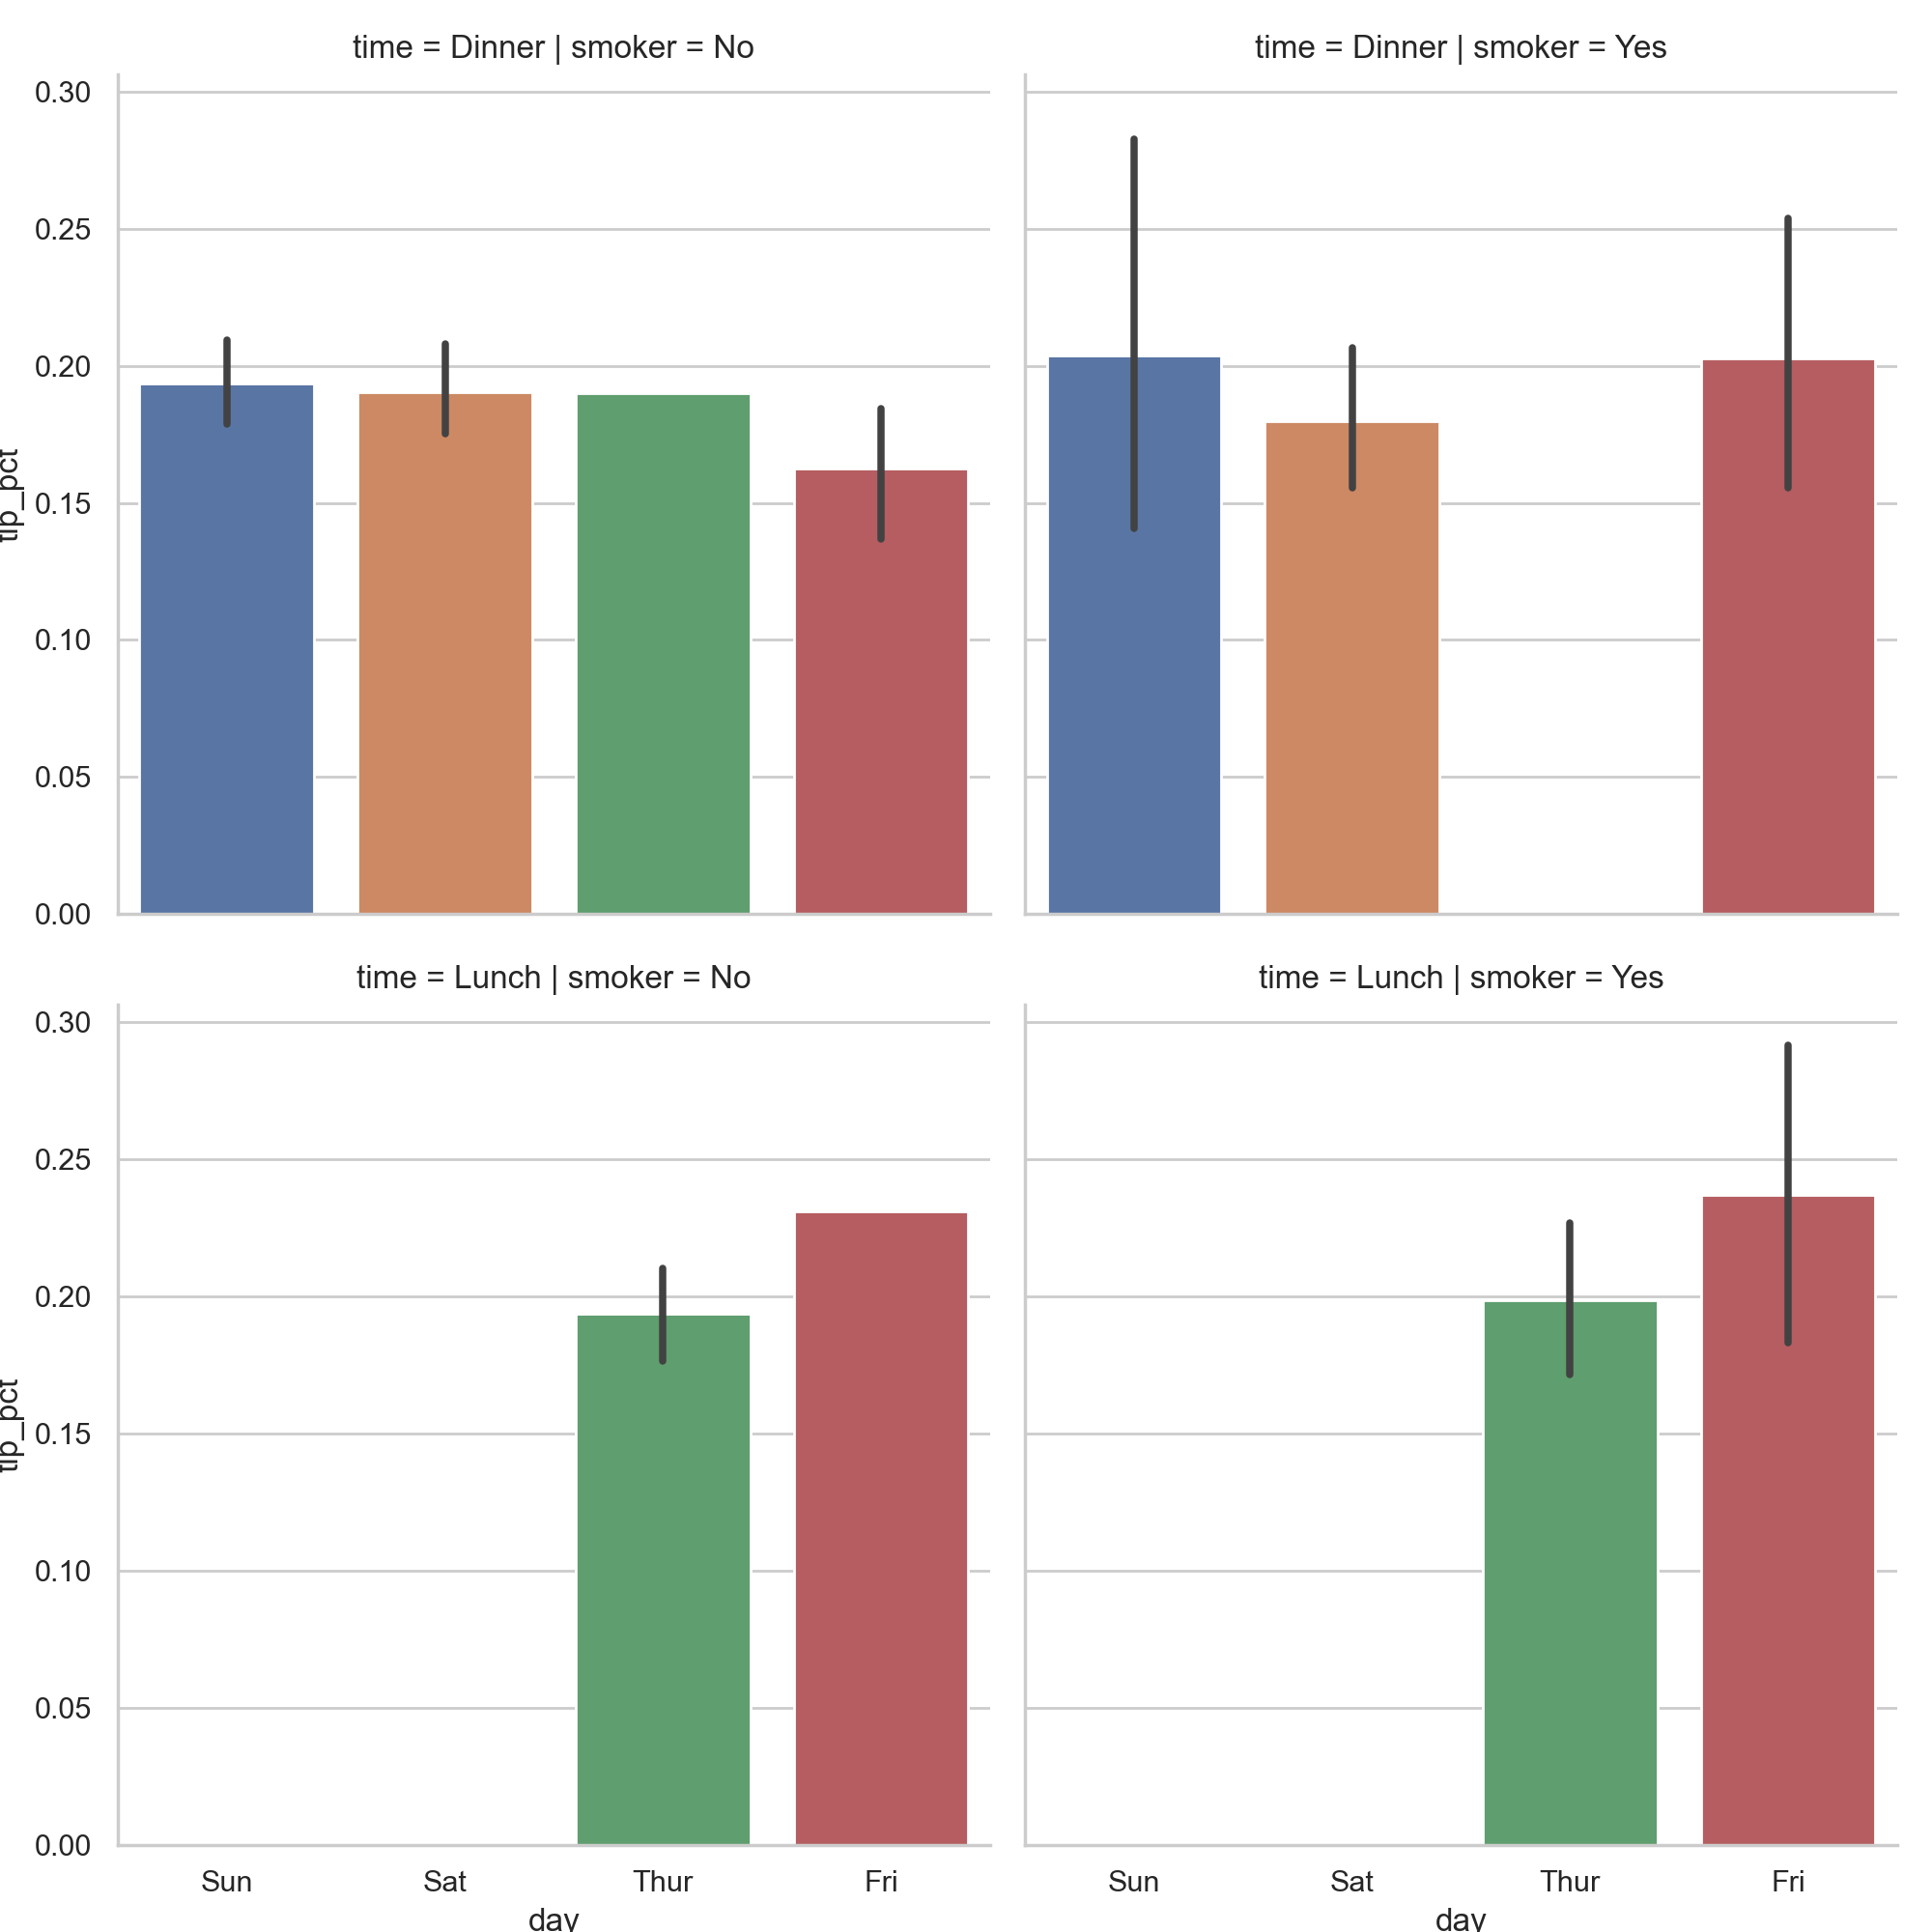

In [94]:
sns.factorplot(
    x='day',
    y='tip_pct',
    row='time',
    col='smoker',
    kind='bar',
    data=tips[tips.tip_pct < 1]
)

/Users/hirotaro.net/opt/anaconda3/envs/data/lib/python3.9/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


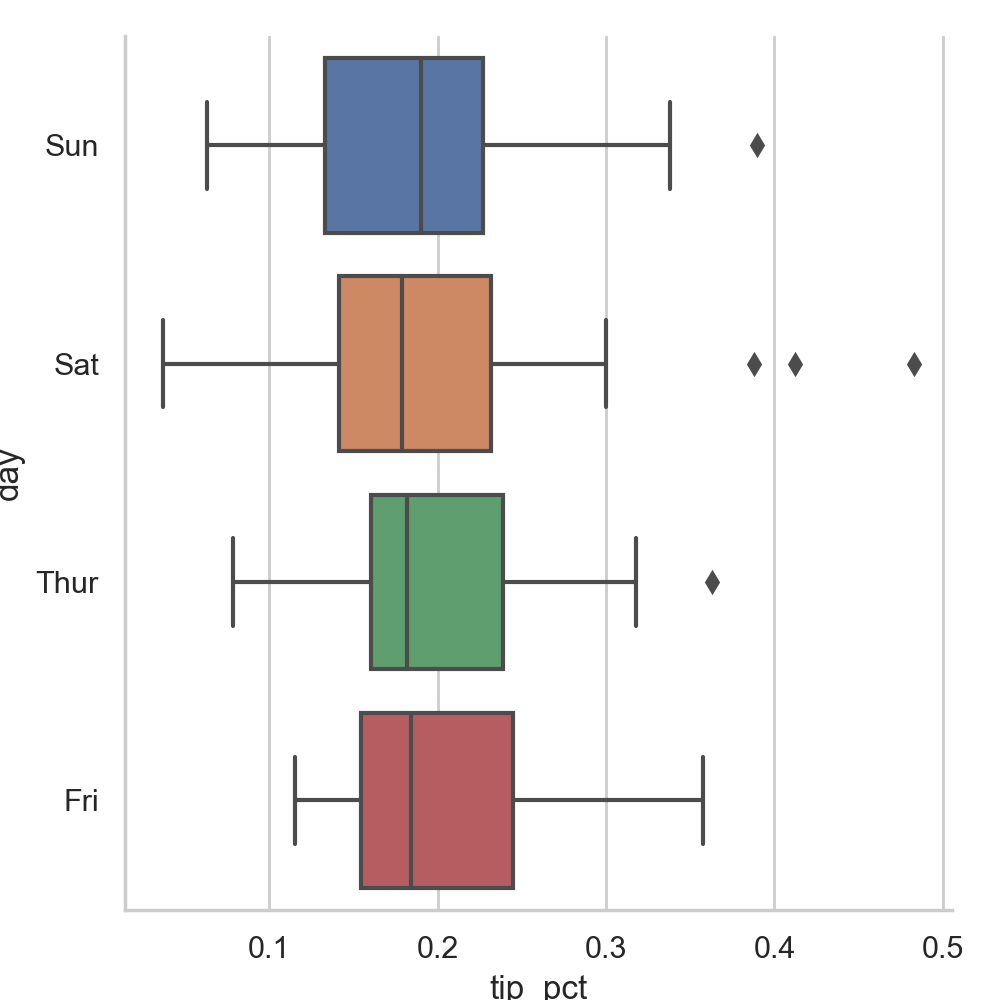

In [95]:
sns.factorplot(
    x='tip_pct',
    y='day',
    kind='box',
    data=tips[tips.tip_pct < 0.5]
)

## 9.3 Other Python Visualization Tools

[BoKeh](https://docs.bokeh.org/en/latest/)  
[Plotly](https://github.com/plotly/plotly.py)